# **Board Meeting Preparation**
##### **using Anomaly Detection**
<p align ="right">Zacharia Schmitz <br>
12 October 2023

---

Email to analyst:

> Hello,
> 
> 
> I have some questions for you that I need to be answered before the board meeting Thursday afternoon. I need to be able to speak to the following 
> questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.
> 
> 
> 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
>
> 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
>
> 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
>
> 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is
> happening? Are there any suspicious IP addresses?
>
> 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
>
> 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
>
> 7. Which lessons are least accessed?
>
> 8. Anything else I should be aware of?
>
> 
> Thank you. <br>

<div style="background-color: #; padding: 0px; ">

## <font size='10'><i>**Plan**</i></font> <font size='5'><i>→ Acquire → Prepare → Explore → Model → Deliver</i></font>

---

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → </i></font> <font size='10'><i>**Acquire**</i></font> <font size='5'><i> → Prepare → Explore → Model → Deliver</i></font>

---

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import env as e

In [2]:
def check_columns(DataFrame, reports=False, graphs=False, dates=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe.
    """

    dataframeinfo = []

    # Check information about the index
    index_dtype = DataFrame.index.dtype
    index_unique_vals = DataFrame.index.unique()
    index_num_unique = DataFrame.index.nunique()
    index_num_null = DataFrame.index.isna().sum()
    index_pct_null = index_num_null / len(DataFrame.index)

    if pd.api.types.is_numeric_dtype(index_dtype) and not isinstance(
        DataFrame.index, pd.RangeIndex
    ):
        index_min_val = DataFrame.index.min()
        index_max_val = DataFrame.index.max()
        index_range_vals = (index_min_val, index_max_val)
    elif pd.api.types.is_datetime64_any_dtype(index_dtype):
        index_min_val = DataFrame.index.min()
        index_max_val = DataFrame.index.max()
        index_range_vals = (
            index_min_val.strftime("%Y-%m-%d"),
            index_max_val.strftime("%Y-%m-%d"),
        )

        # Check for missing dates in the index if dates kwarg is True
        if dates:
            full_date_range = pd.date_range(
                start=index_min_val, end=index_max_val, freq="D"
            )
            missing_dates = full_date_range.difference(DataFrame.index)
            if not missing_dates.empty:
                print(
                    f"Missing dates in index: ({len(missing_dates)} Total) {missing_dates.tolist()}"
                )
    else:
        index_range_vals = None

    dataframeinfo.append(
        [
            "index",
            index_dtype,
            index_num_unique,
            index_num_null,
            index_pct_null,
            index_unique_vals,
            index_range_vals,
        ]
    )

    print(f"Total rows: {DataFrame.shape[0]}")
    print(f"Total columns: {DataFrame.shape[1]}")

    if reports:
        describe = DataFrame.describe().round(2)
        print(describe)

    if graphs:
        DataFrame.hist(figsize=(10, 10))
        plt.subplots_adjust(hspace=0.5)
        plt.show()

    for column in DataFrame.columns:
        dtype = DataFrame[column].dtype
        unique_vals = DataFrame[column].unique()
        num_unique = DataFrame[column].nunique()
        num_null = DataFrame[column].isna().sum()
        pct_null = DataFrame[column].isna().mean().round(5)

        if pd.api.types.is_numeric_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            mean_val = DataFrame[column].mean()
            range_vals = (min_val, max_val, mean_val)
        elif pd.api.types.is_datetime64_any_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            range_vals = (min_val.strftime("%Y-%m-%d"), max_val.strftime("%Y-%m-%d"))

            if dates:
                full_date_range_col = pd.date_range(
                    start=min_val, end=max_val, freq="D"
                )
                missing_dates_col = full_date_range_col.difference(DataFrame[column])
                if not missing_dates_col.empty:
                    print(
                        f"Missing dates in column '{column}': ({len(missing_dates_col)} Total) {missing_dates_col.tolist()}"
                    )
                else:
                    print(f"No missing dates in column '{column}'")

        else:
            range_vals = None

        dataframeinfo.append(
            [column, dtype, num_unique, num_null, pct_null, unique_vals, range_vals]
        )

    return pd.DataFrame(
        dataframeinfo,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )

In [3]:
# Read in the log file

colnames = ['date', 'time', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
df = pd.read_csv("anonymized-curriculum-access.txt", 
                 sep="\s", 
                 header=None, 
                 names = colnames, 
                 usecols=[0, 1, 2, 3, 4, 5])

/var/folders/sn/k1pt9tkj3532_42jfk9zdjhc0000gn/T/ipykernel_56790/2870071277.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("anonymized-curriculum-access.txt",


In [4]:
query = '''SELECT * FROM cohorts'''

cohort = e.get_data('curriculum_logs', query, 'cohorts.csv')

Used cached CSV.
Rows and Columns: (53, 9)


In [5]:
check_columns(cohort)

Total rows: 53
Total columns: 9


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,53,0,0.0,"RangeIndex(start=0, stop=53, step=1)",None
1,id,int64,53,0,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(1, 139, 43.45283018867924)"
2,name,object,53,0,0.0,"[Arches, Badlands, Carlsbad, Denali, Everglade...",None
3,slack,object,52,0,0.0,"[#arches, #badlands, #carlsbad, #denali, #ever...",None
4,start_date,object,49,0,0.0,"[2014-02-04, 2014-06-04, 2014-09-04, 2014-10-2...",None
5,end_date,object,50,0,0.0,"[2014-04-22, 2014-08-22, 2014-11-05, 2015-01-1...",None
6,created_at,object,41,0,0.0,"[2016-06-14 19:52:26, 2016-07-18 19:06:27, 201...",None
7,updated_at,object,41,0,0.0,"[2016-06-14 19:52:26, 2016-07-18 19:06:27, 201...",None
8,deleted_at,float64,0,53,1.0,[nan],"(nan, nan, nan)"
9,program_id,int64,4,0,0.0,"[1, 4, 2, 3]","(1, 4, 1.9245283018867925)"


In [6]:
check_columns(df)

Total rows: 900223
Total columns: 6


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,900223,0,0.00000,"RangeIndex(start=0, stop=900223, step=1)",None
1,date,object,1182,0,0.00000,"[2018-01-26, 2018-01-27, 2018-01-28, 2018-01-2...",None
2,time,object,73167,0,0.00000,"[09:55:03, 09:56:02, 09:56:05, 09:56:06, 09:56...",None
3,endpoint,object,2313,1,0.00000,"[/, java-ii, java-ii/object-oriented-programmi...",None
4,user_id,int64,981,0,0.00000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(1, 981, 458.82570651938465)"
5,cohort_id,float64,47,52893,0.05876,"[8.0, 22.0, 21.0, 1.0, 16.0, 18.0, 19.0, nan, ...","(1.0, 139.0, 48.501049178006205)"
6,source_ip,object,5531,0,0.00000,"[97.105.19.61, 71.137.146.71, 209.205.123.242,...",None


<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → </i></font> <font size='10'><i>**Prepare**</i></font> <font size='5'><i> → Explore → Model → Deliver</i></font>

--- 

### To Do:

- Combine the date and the time columns and make datetime, dropping original

- Rename endpoint to filepath

- Make an endpoint column

- Cohort_id into a float, for less memory usage

- Investigate nulls in cohort_id

- Find a way to merge cohorts to the logs df

#### Cohort DF

In [7]:
# Make the start_date date time

cohort['start_date'] = pd.to_datetime(cohort['start_date'])

In [8]:
cohort

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,3,Carlsbad,#carlsbad,2014-09-04,2014-11-05,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,4,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,5,Everglades,#everglades,2014-11-18,2015-02-24,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
5,6,Franklin,#franklin,2015-02-03,2015-05-26,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
6,7,Glacier,#glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
7,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
8,9,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,4
9,10,Balboa,#balboa,2015-11-03,2016-03-11,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,4


In [9]:
# What program id is ada

cohort[cohort.name == 'Ada']

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
29,30,Ada,#ada,2019-02-04,2019-06-16,2019-02-04 20:13:32,2019-02-04 20:13:32,NaN,3


In [10]:
# Make a blank program column

cohort['program'] = ''

In [11]:
# Make program_id 2 web dev

cohort.loc[cohort.program_id == 1, 'program'] = 'web_php'
cohort.loc[cohort.program_id == 2, 'program'] = 'web_java'
cohort.loc[cohort.program_id == 3, 'program'] = 'data'
cohort.loc[cohort.program_id == 4, 'program'] = 'web_front'

# Assign colum id 28 to program staff

cohort.loc[cohort.id == 28, 'program'] = 'staff'

In [12]:
check_columns(cohort)

Total rows: 53
Total columns: 10


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,53,0,0.0,"RangeIndex(start=0, stop=53, step=1)",None
1,id,int64,53,0,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(1, 139, 43.45283018867924)"
2,name,object,53,0,0.0,"[Arches, Badlands, Carlsbad, Denali, Everglade...",None
3,slack,object,52,0,0.0,"[#arches, #badlands, #carlsbad, #denali, #ever...",None
4,start_date,datetime64[ns],49,0,0.0,"[2014-02-04 00:00:00, 2014-06-04 00:00:00, 201...","(2014-02-04, 2021-04-12)"
5,end_date,object,50,0,0.0,"[2014-04-22, 2014-08-22, 2014-11-05, 2015-01-1...",None
6,created_at,object,41,0,0.0,"[2016-06-14 19:52:26, 2016-07-18 19:06:27, 201...",None
7,updated_at,object,41,0,0.0,"[2016-06-14 19:52:26, 2016-07-18 19:06:27, 201...",None
8,deleted_at,float64,0,53,1.0,[nan],"(nan, nan, nan)"
9,program_id,int64,4,0,0.0,"[1, 4, 2, 3]","(1, 4, 1.9245283018867925)"


In [13]:
# Reduce to what we need

cols = ['id', 'name', 'start_date', 'end_date', 'program']

cohort = cohort[cols]

#### Combine the date and the time columns and make datetime

In [14]:
# Combine date and time and make into datetime

df['datetime'] = df.date + " " + df.time
df['datetime'] = pd.to_datetime(df.datetime)
df = df.drop(columns=['date', 'time'])

#### Rename endpoint to path

In [15]:
# Rename endpoint to path

df = df.rename(columns={'endpoint': 'path'})

#### Make an endpoint column

In [16]:
# Make an endpoint from the last portion of path column

df['endpoint'] = df.path.str.rsplit('/', n=1).str[-1]

#### Make a startpoint from path

In [17]:
# Make a startpoint from the path

df['startpoint'] = df.path.str.split('/', n=1).str[0]

#### Make blanks in startpoint homepage

In [18]:
# Make all the previous / values homepage

df.loc[df.startpoint == '', 'startpoint'] = 'homepage'

#### Handle Nulls in cohort_id (to be continued)

In [19]:
# Value count for cohort_id sorted by cohort_id
df.cohort_id.value_counts(dropna=False).sort_index()

cohort_id
1.0       8890
2.0         93
4.0          4
5.0          1
6.0         72
7.0        598
8.0       1712
9.0          5
11.0       253
12.0       302
13.0      2845
14.0      9587
15.0       691
16.0       755
17.0      4954
18.0      2158
19.0      1237
21.0      7444
22.0     30926
23.0     28534
24.0     35636
25.0     25586
26.0     27749
27.0     20743
28.0     84031
29.0     38096
31.0     25359
32.0     29356
33.0     40730
34.0     26538
51.0     32888
52.0     28033
53.0     36902
55.0     21582
56.0     33568
57.0     33844
58.0     29855
59.0     32015
61.0     17713
62.0     37109
132.0    23691
133.0    14715
134.0    16623
135.0    16397
137.0     8562
138.0     7276
139.0     1672
NaN      52893
Name: count, dtype: int64

In [20]:
# Look at nulls in cohort_id
dfnulls = df[df.cohort_id.isnull()]

In [21]:
dfnulls

,path,user_id,cohort_id,source_ip,datetime,endpoint,startpoint
411,/,48,NaN,97.105.19.61,2018-01-26 16:46:16,,homepage
412,spring/extra-features/form-validation,48,NaN,97.105.19.61,2018-01-26 16:46:24,form-validation,spring
425,/,48,NaN,97.105.19.61,2018-01-26 17:54:24,,homepage
435,/,48,NaN,97.105.19.61,2018-01-26 18:32:03,,homepage
436,mysql/relationships/joins,48,NaN,97.105.19.61,2018-01-26 18:32:17,joins,mysql
...,...,...,...,...,...,...,...
899897,javascript-ii,717,NaN,136.50.102.126,2021-04-21 12:49:00,javascript-ii,javascript-ii
899898,javascript-ii/es6,717,NaN,136.50.102.126,2021-04-21 12:49:02,es6,javascript-ii
899899,javascript-ii/map-filter-reduce,717,NaN,136.50.102.126,2021-04-21 12:51:27,map-filter-reduce,javascript-ii
899900,javascript-ii/promises,717,NaN,136.50.102.126,2021-04-21 12:52:37,promises,javascript-ii


Text(0.5, 1.0, 'Amount of nulls by time')

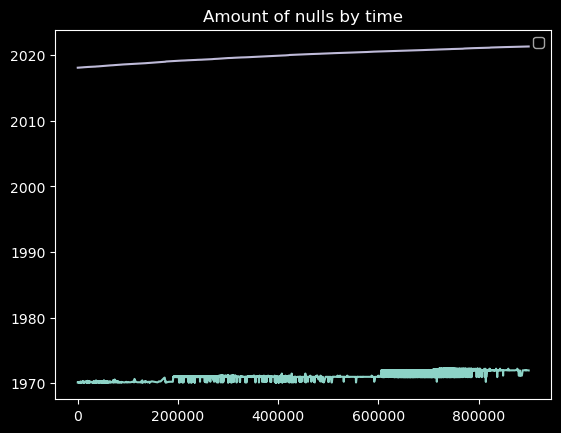

In [22]:
# Plot nulls
dfnulls.plot()
plt.legend('')
plt.title('Amount of nulls by time')

Very sporatic nulls throughout the dataset.

In [23]:
# Initialize a blank column named program_id and program

df['program_id'] = ''

df['program'] = ''

#### Get all unique startpoints

In [24]:
# Get all unique startpoints

df.startpoint.value_counts().head(60)

startpoint
javascript-i                    118723
html-css                         84935
mysql                            82320
jquery                           60869
spring                           58603
java-iii                         56733
java-ii                          55107
homepage                         50313
java-i                           41158
javascript-ii                    38796
appendix                         36867
search                           19524
toc                              18297
examples                         14855
classification                   11476
fundamentals                     11162
1-fundamentals                   10159
content                           9308
sql                               9045
slides                            7700
3-sql                             7589
python                            6759
4-python                          5975
6-regression                      5953
5-stats                           4015
stats         

#### Cohort_id into a float, for less memory usage (MAYBE - after nulls)

Text(0.5, 1.0, 'Amount of nulls by time')

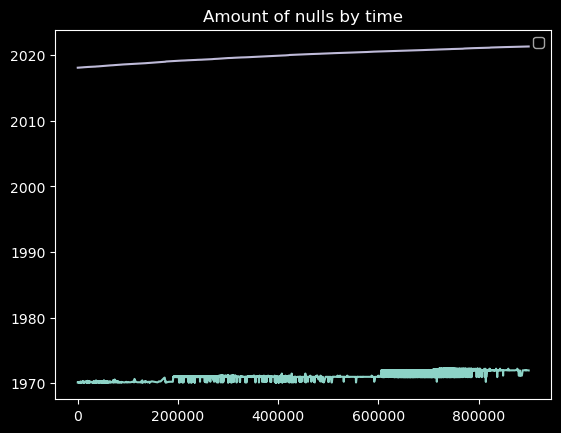

In [25]:
dfnulls.plot()
plt.legend('')
plt.title('Amount of nulls by time')

#### Change / in path to homepage

In [26]:
# Change / in path column to homepage

df.loc[df.path == '/', 'path'] = 'homepage'

### Join Cohort and Logs

In [27]:
check_columns(cohort)

Total rows: 53
Total columns: 5


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,53,0,0.0,"RangeIndex(start=0, stop=53, step=1)",None
1,id,int64,53,0,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(1, 139, 43.45283018867924)"
2,name,object,53,0,0.0,"[Arches, Badlands, Carlsbad, Denali, Everglade...",None
3,start_date,datetime64[ns],49,0,0.0,"[2014-02-04 00:00:00, 2014-06-04 00:00:00, 201...","(2014-02-04, 2021-04-12)"
4,end_date,object,50,0,0.0,"[2014-04-22, 2014-08-22, 2014-11-05, 2015-01-1...",None
5,program,object,5,0,0.0,"[web_php, web_front, web_java, staff, data]",None


In [28]:
check_columns(df)

Total rows: 900223
Total columns: 9


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,900223,0,0.00000,"RangeIndex(start=0, stop=900223, step=1)",None
1,path,object,2313,1,0.00000,"[homepage, java-ii, java-ii/object-oriented-pr...",None
2,user_id,int64,981,0,0.00000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(1, 981, 458.82570651938465)"
3,cohort_id,float64,47,52893,0.05876,"[8.0, 22.0, 21.0, 1.0, 16.0, 18.0, 19.0, nan, ...","(1.0, 139.0, 48.501049178006205)"
4,source_ip,object,5531,0,0.00000,"[97.105.19.61, 71.137.146.71, 209.205.123.242,...",None
5,datetime,datetime64[ns],856584,0,0.00000,"[2018-01-26 09:55:03, 2018-01-26 09:56:02, 201...","(2018-01-26, 2021-04-21)"
6,endpoint,object,1508,1,0.00000,"[, java-ii, object-oriented-programming, objec...",None
7,startpoint,object,755,1,0.00000,"[homepage, java-ii, slides, javascript-i, mkdo...",None
8,program_id,object,1,0,0.00000,[],None
9,program,object,1,0,0.00000,[],None


In [29]:
# Join the cohort data with the main DataFrame
df = df.merge(cohort, left_on='cohort_id', right_on='id', how='left')

# Drop the redundant 'id' column
df.drop('id', axis=1, inplace=True)

In [30]:
# Drop merge columns program_id, program_x

df.drop(columns=['program_id', 'program_x'], inplace=True)

In [31]:
# Rename program_y to program

df.rename(columns={'program_y': 'program'}, inplace=True)

In [32]:
# Rename start_date to class_start

df.rename(columns={'start_date': 'class_start'}, inplace=True)

In [33]:
# Rename end_date to class_end

df.rename(columns={'end_date': 'class_end'}, inplace=True)

In [34]:
# Make datetimes usable

df['class_start'] = pd.to_datetime(df['class_start'])
df['class_end'] = pd.to_datetime(df['class_end'])

### Preparation Completed

In [35]:
check_columns(df)

Total rows: 900223
Total columns: 11


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,900223,0,0.00000,"RangeIndex(start=0, stop=900223, step=1)",None
1,path,object,2313,1,0.00000,"[homepage, java-ii, java-ii/object-oriented-pr...",None
2,user_id,int64,981,0,0.00000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(1, 981, 458.82570651938465)"
3,cohort_id,float64,47,52893,0.05876,"[8.0, 22.0, 21.0, 1.0, 16.0, 18.0, 19.0, nan, ...","(1.0, 139.0, 48.501049178006205)"
4,source_ip,object,5531,0,0.00000,"[97.105.19.61, 71.137.146.71, 209.205.123.242,...",None
5,datetime,datetime64[ns],856584,0,0.00000,"[2018-01-26 09:55:03, 2018-01-26 09:56:02, 201...","(2018-01-26, 2021-04-21)"
6,endpoint,object,1508,1,0.00000,"[, java-ii, object-oriented-programming, objec...",None
7,startpoint,object,755,1,0.00000,"[homepage, java-ii, slides, javascript-i, mkdo...",None
8,name,object,47,52893,0.05876,"[Hampton, Teddy, Sequoia, Arches, Niagara, Pin...",None
9,class_start,datetime64[ns],44,52893,0.05876,"[2015-09-22 00:00:00, 2018-01-08 00:00:00, 201...","(2014-02-04, 2021-04-12)"


In [36]:
# Cache the finished CSV

df.to_csv('curriculum_access.csv')

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → </i></font> <font size='10'><i>**Questions**</i></font> <font size='5'><i>→ Model → Deliver</i></font>
---

In [37]:
# List all of the programs

df.program.value_counts()

program
web_java     629334
data         103412
staff         84031
web_php       30548
web_front         5
Name: count, dtype: int64

In [38]:
webjava = df[df.program == 'web_java']
webjava.shape

(629334, 11)

In [39]:
webphp = df[df.program == 'web_php']
webphp.shape

(30548, 11)

In [40]:
webfront = df[df.program == 'web_front']
webfront.shape

(5, 11)

In [50]:
data = df[df.program == 'data']
data.shape

(103412, 11)

In [41]:
staff = df[df.program == 'staff']
staff.shape

(84031, 11)

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


<Axes: title={'center': 'Top 10 Pages for Web Frontend Dev'}, ylabel='path'>

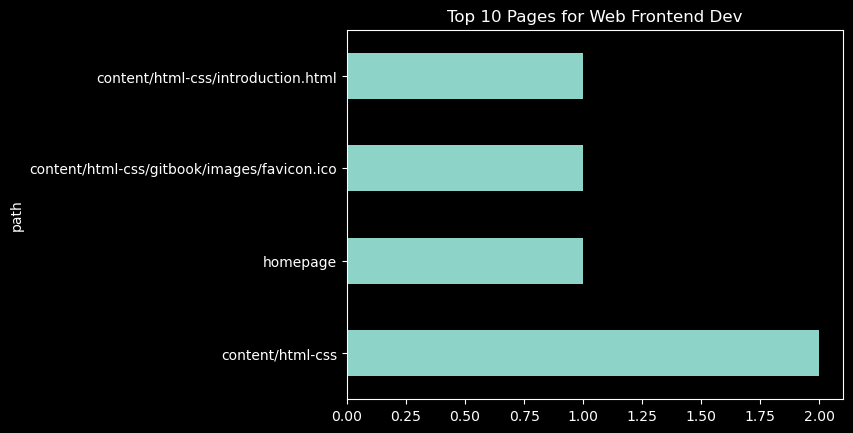

In [47]:
# Which lesson appears to attract the most traffic per program (web)

top10webfront = webfront.path.value_counts().head(10).plot.barh()
plt.title('Top 10 Pages for Web Frontend Dev')

top10webfront

<Axes: title={'center': 'Top 10 Pages for Web PHP'}, ylabel='path'>

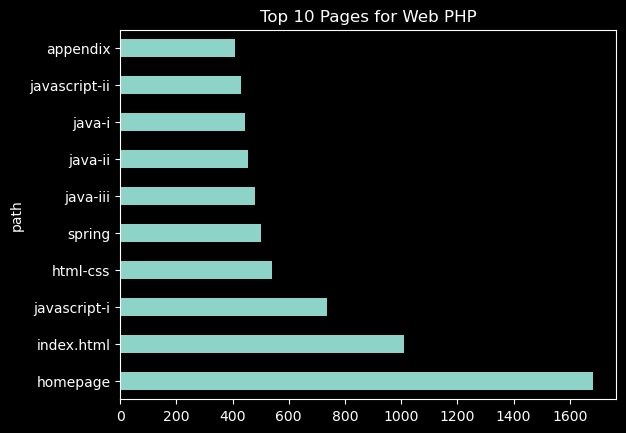

In [46]:
# Which lesson appears to attract the most traffic per program (web)

top10webphp = webphp.path.value_counts().head(10).plot.barh()
plt.title('Top 10 Pages for Web PHP Dev')

top10webphp

<Axes: title={'center': 'Top 10 Pages for Web Java Dev'}, ylabel='path'>

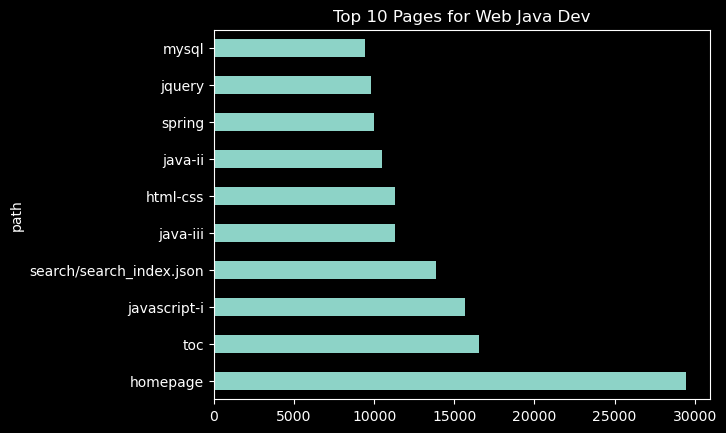

In [48]:
# Which lesson appears to attract the most traffic per program (web)

top10webjava = webjava.path.value_counts().head(10).plot.barh()
plt.title('Top 10 Pages for Web Java Dev')

top10webjava

<Axes: title={'center': 'Top 10 Pages for Data'}, ylabel='path'>

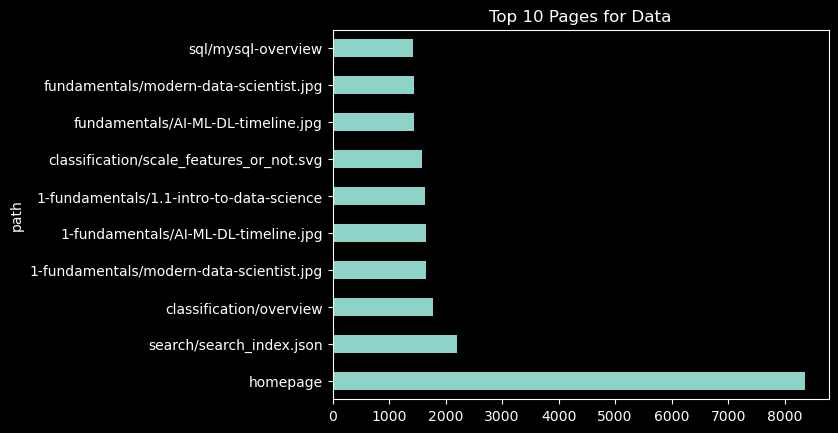

In [51]:
# Which lesson appears to attract the most traffic per program (data)

top10data = data.path.value_counts().head(10).plot.barh()
plt.title('Top 10 Pages for Data')

top10data

Text(0.5, 1.0, 'Top 10 Pages for Staff')

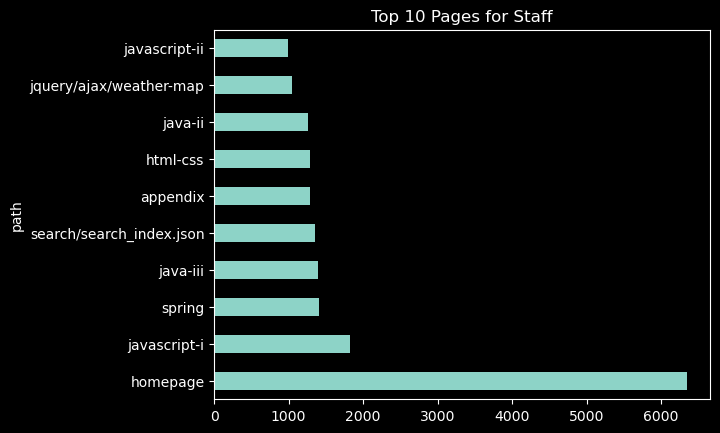

In [52]:
# Which lesson appears to attract the most traffic per program (staff)

staff.path.value_counts().head(10).plot.barh()
plt.title('Top 10 Pages for Staff')

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

#### Web Dev Cohorts

#### Web Dev Java

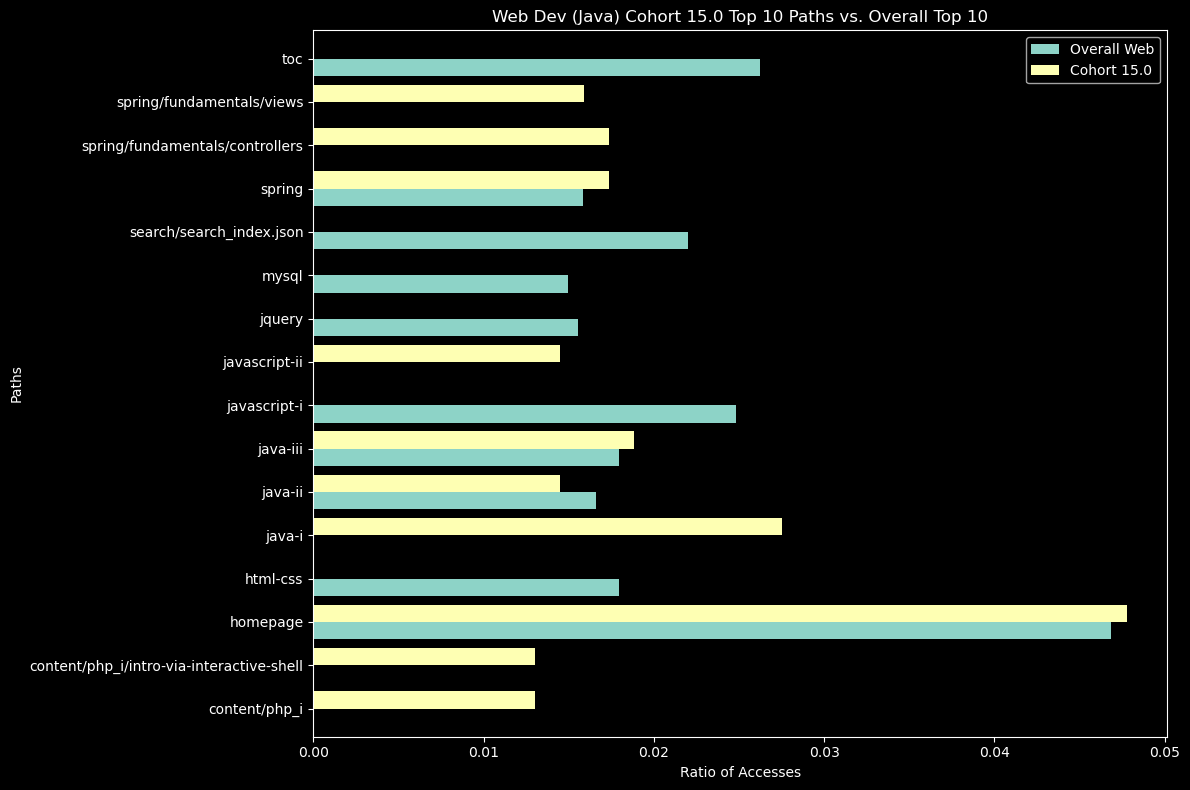

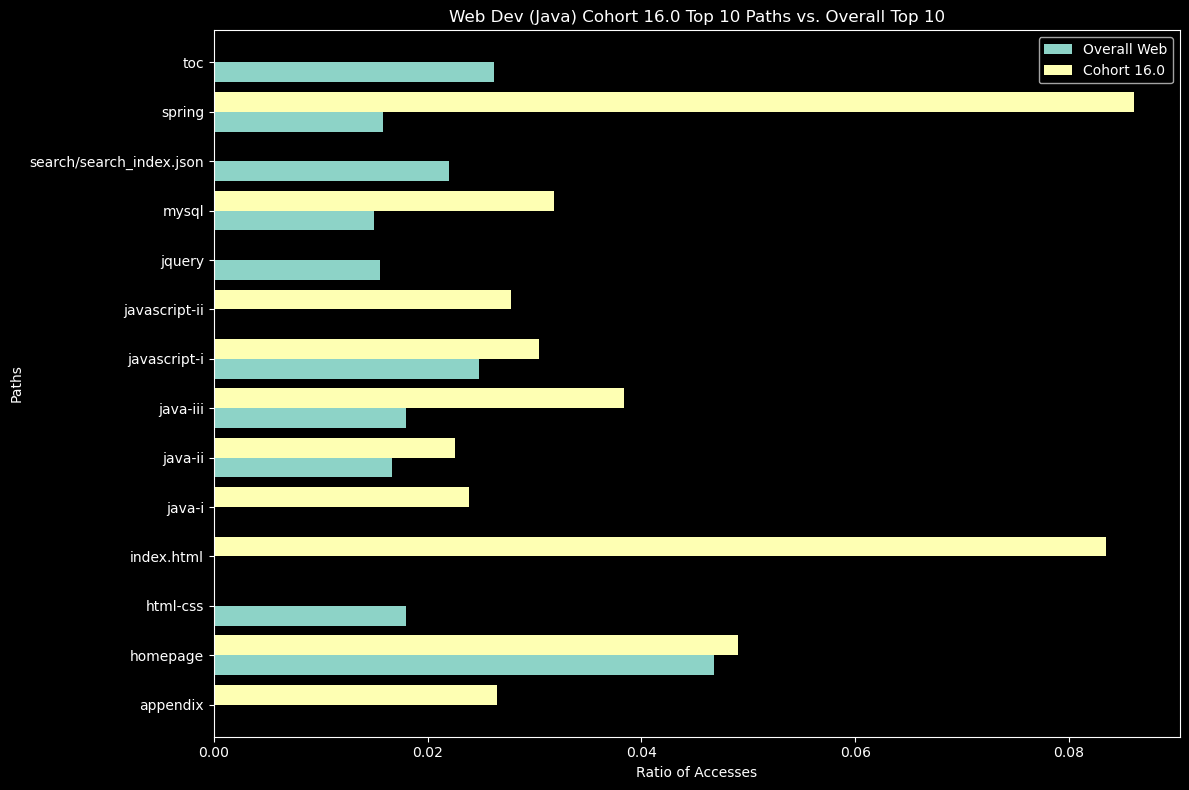

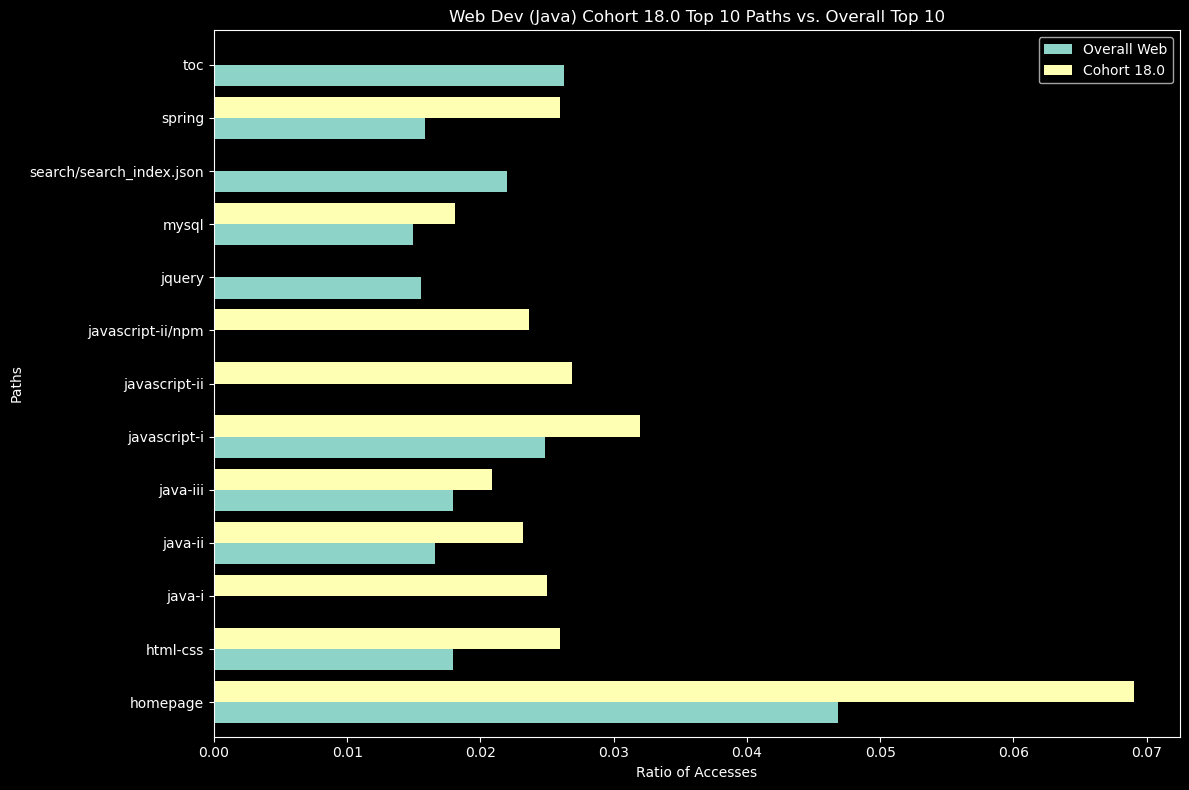

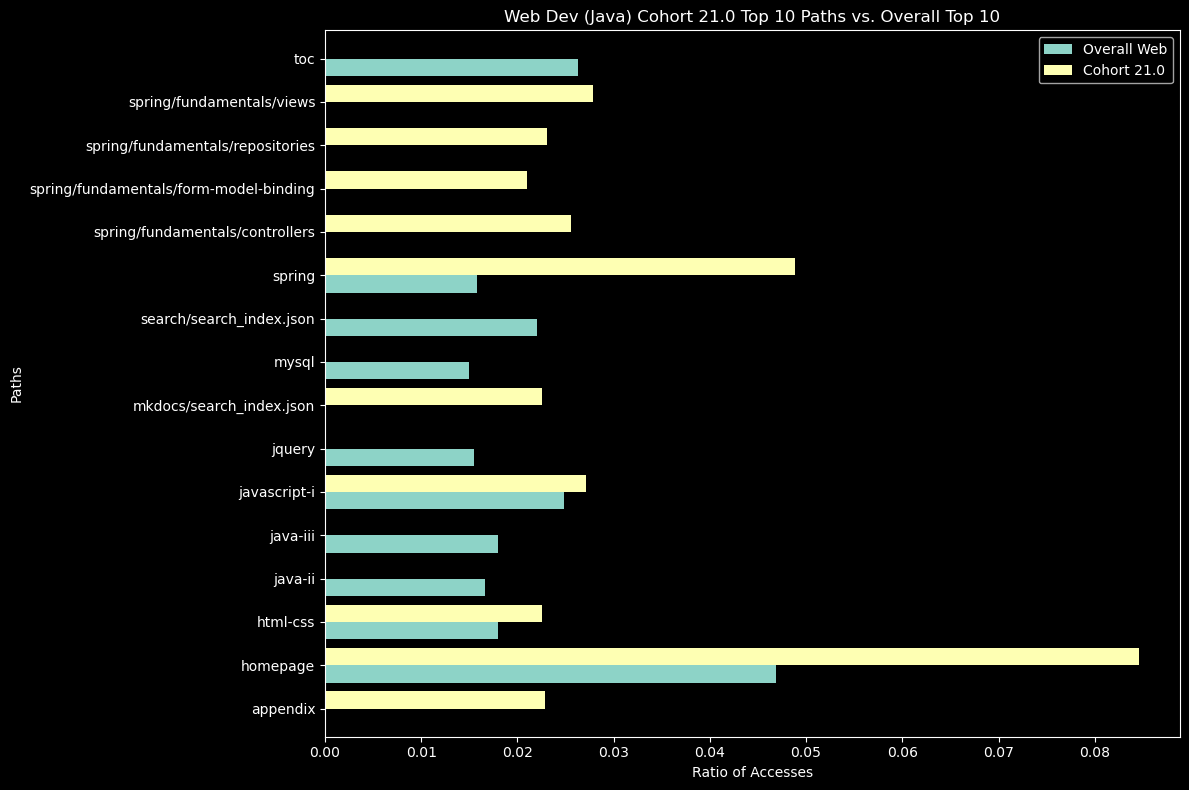

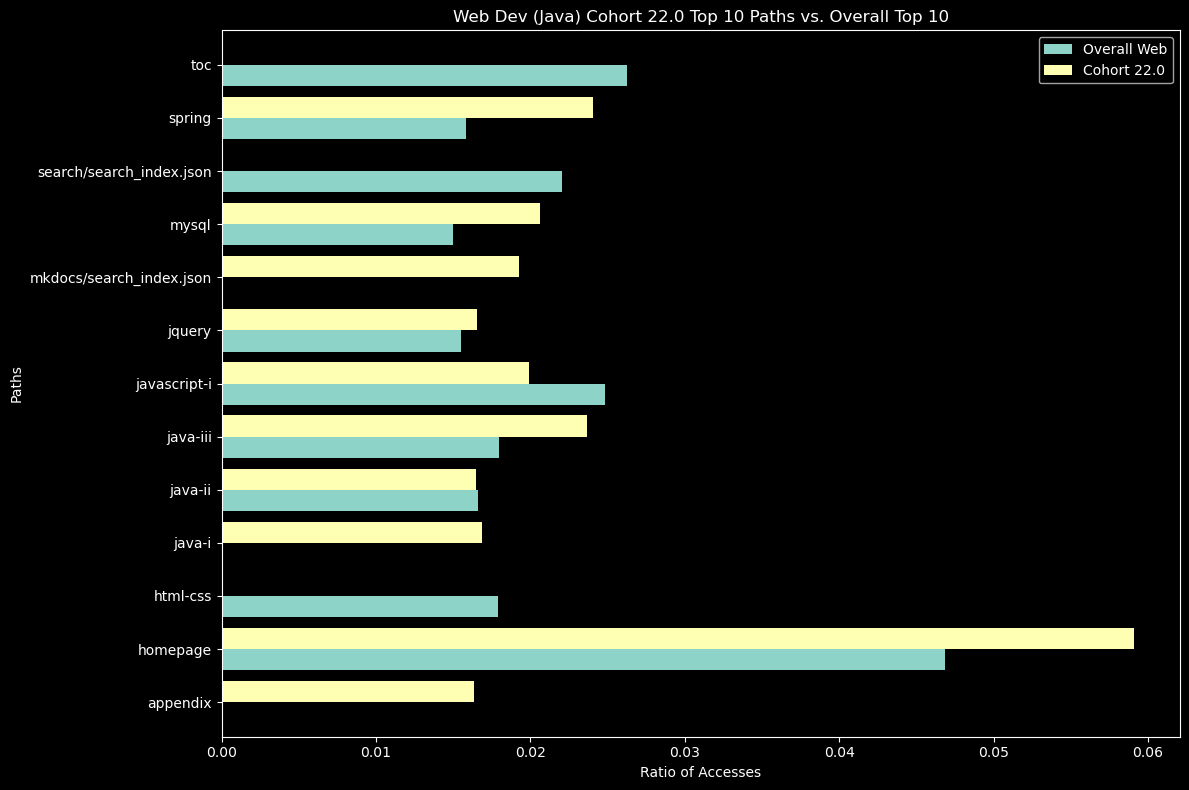

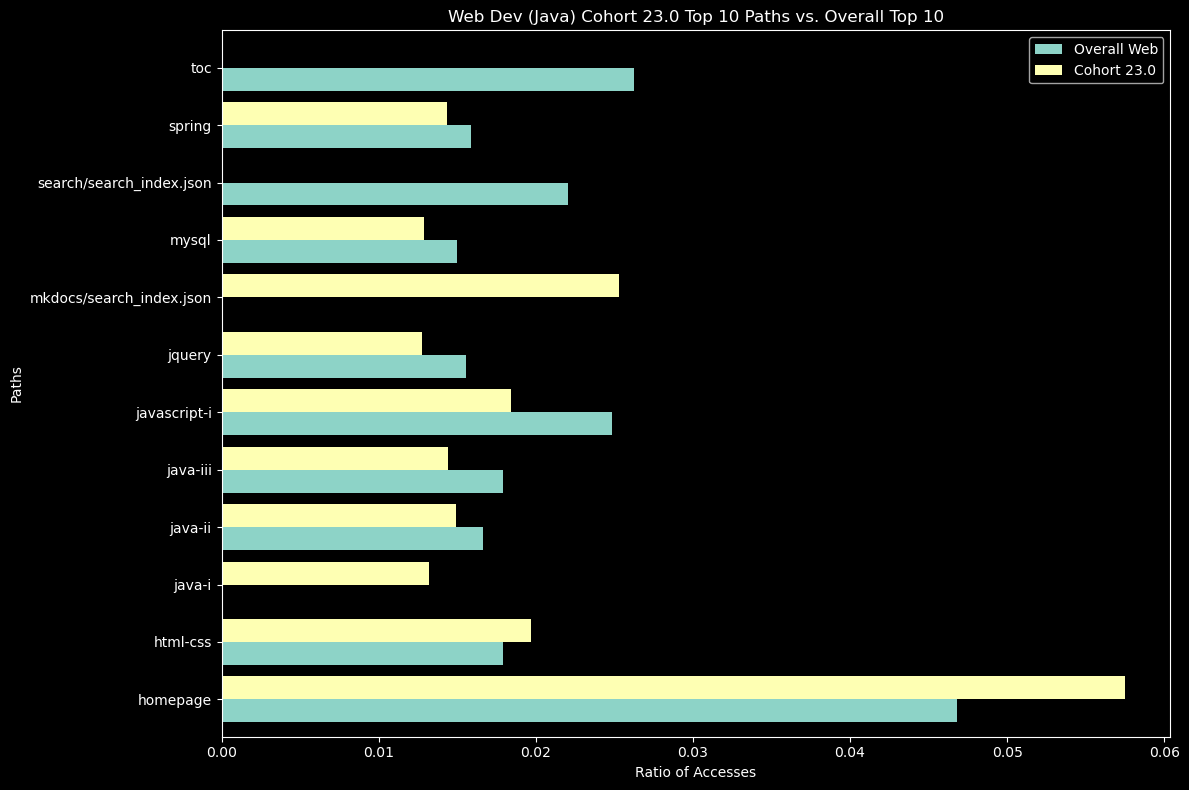

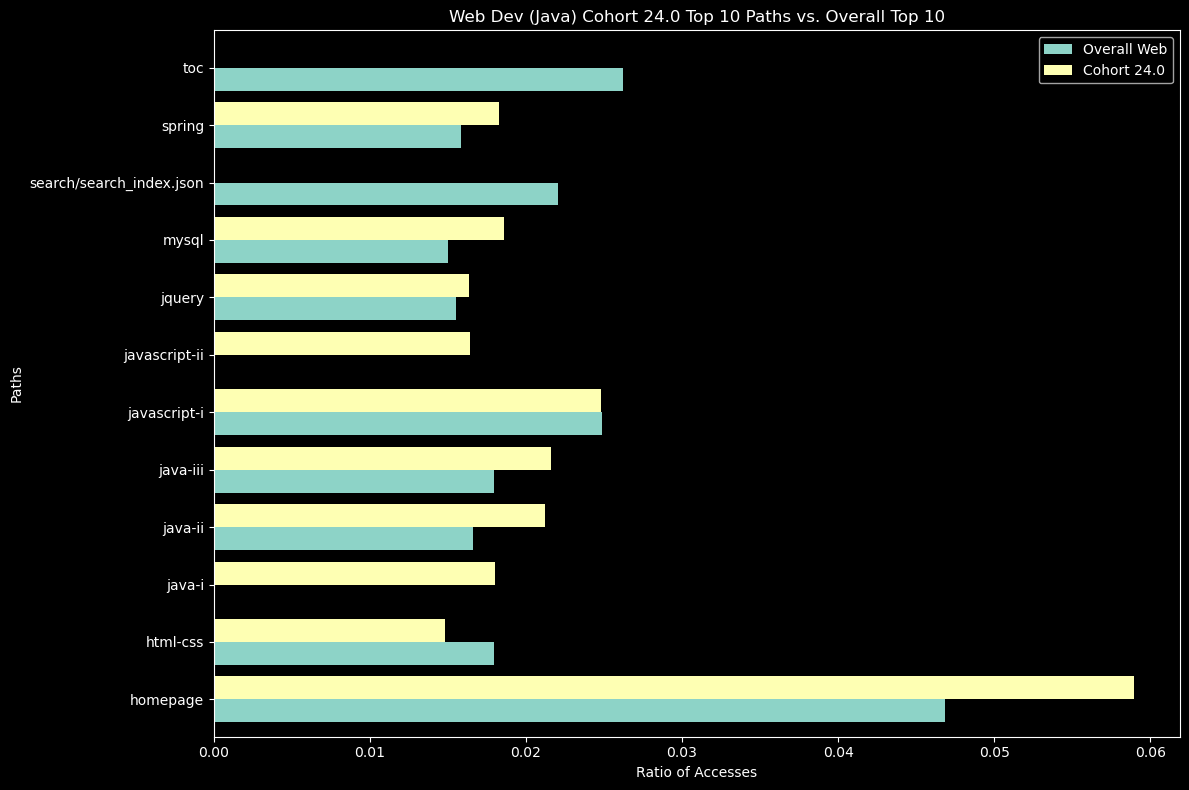

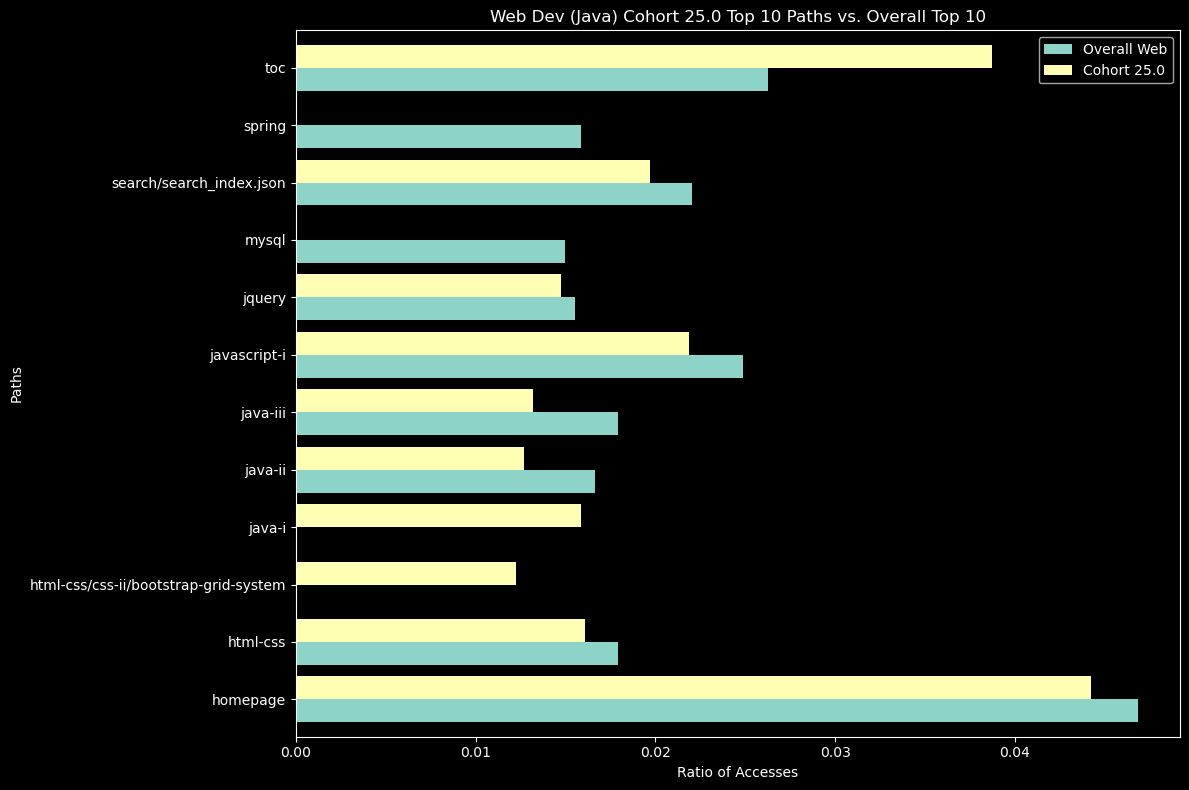

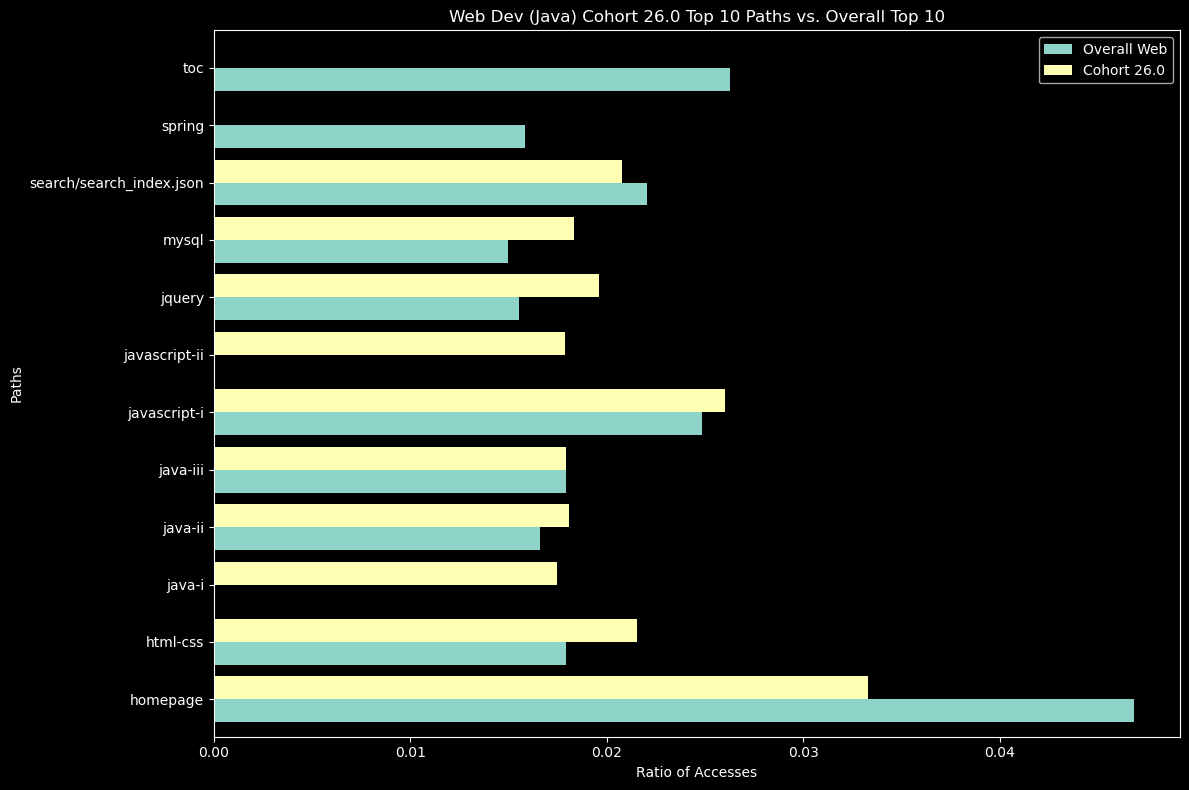

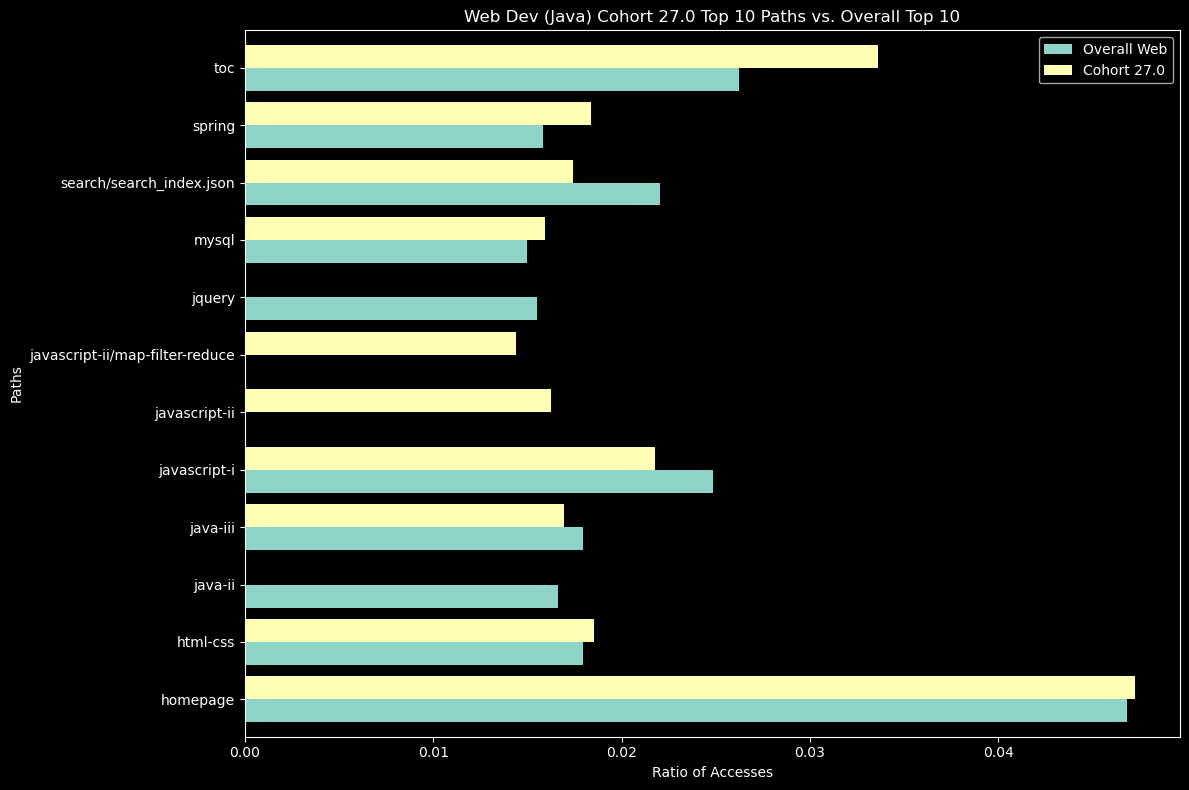

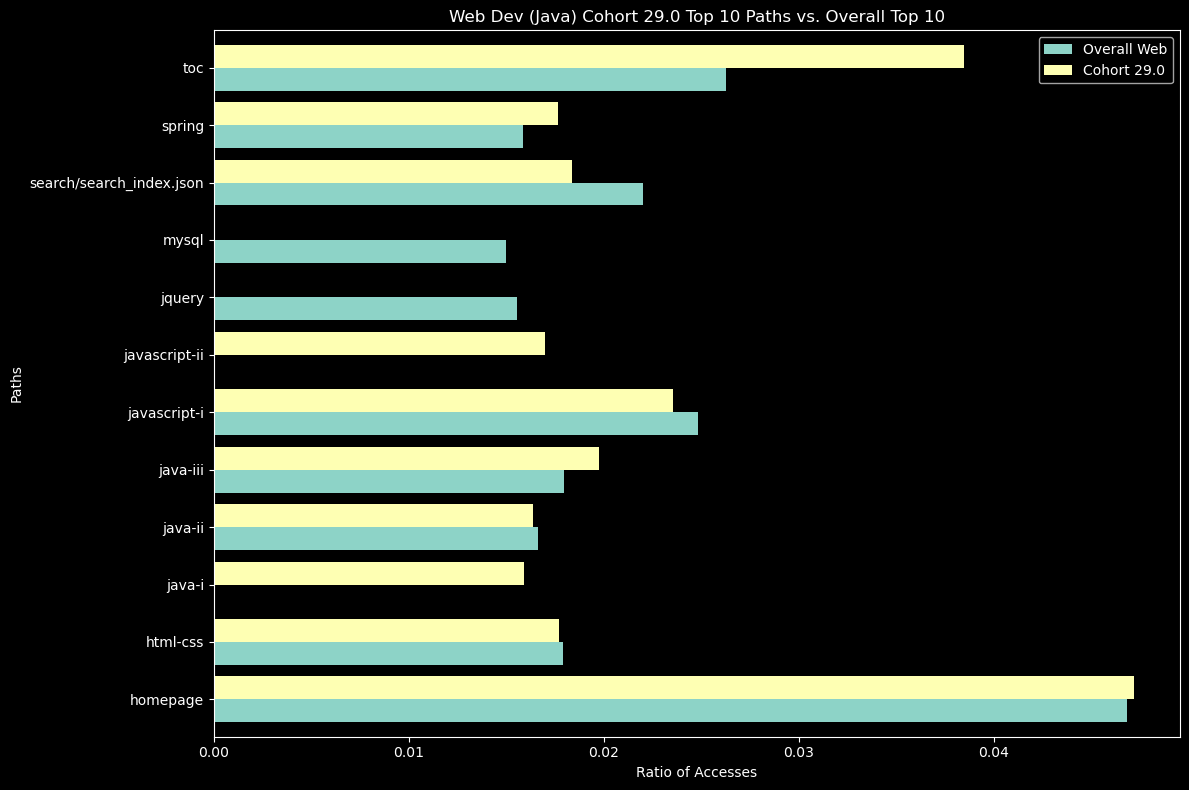

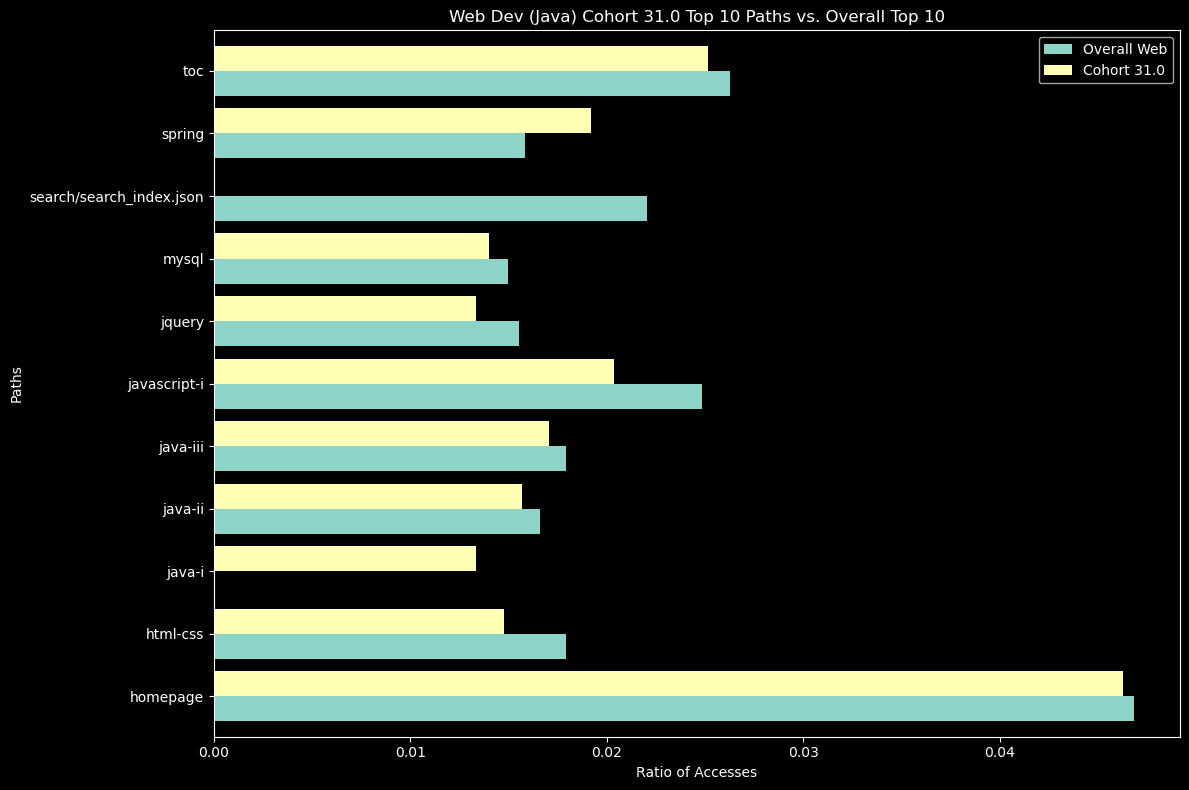

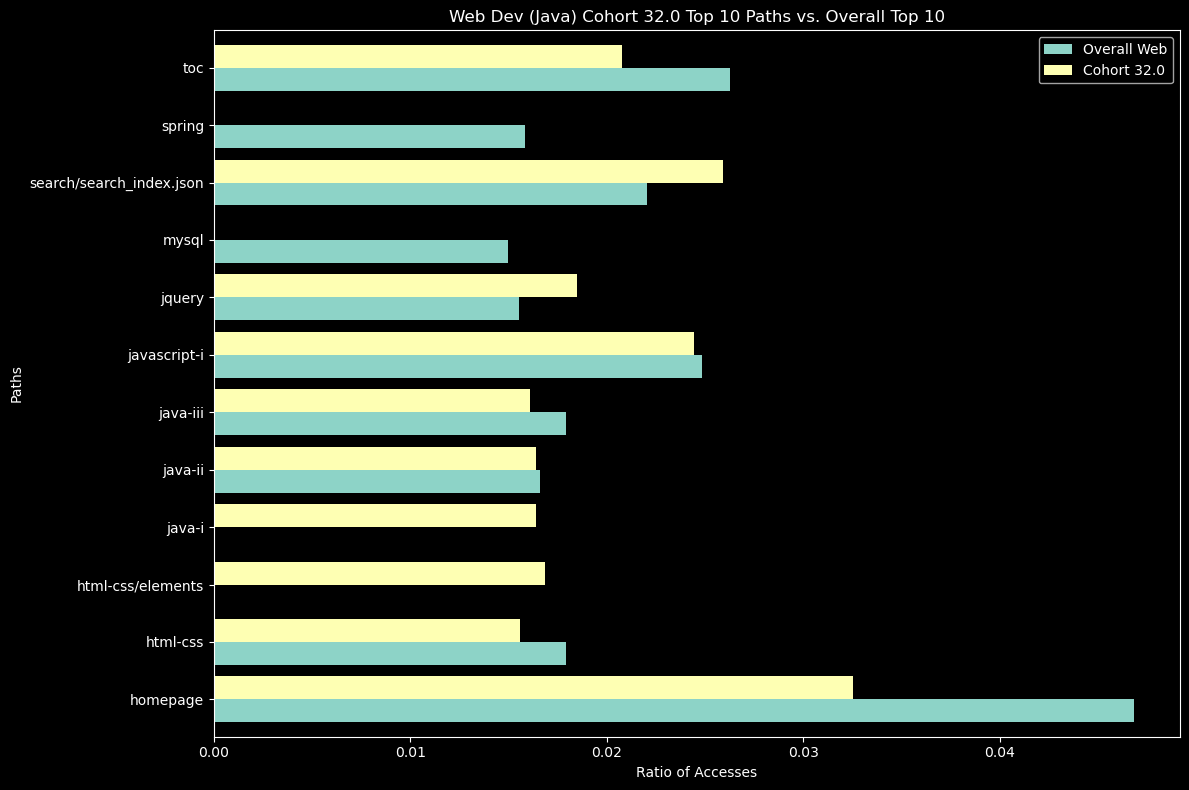

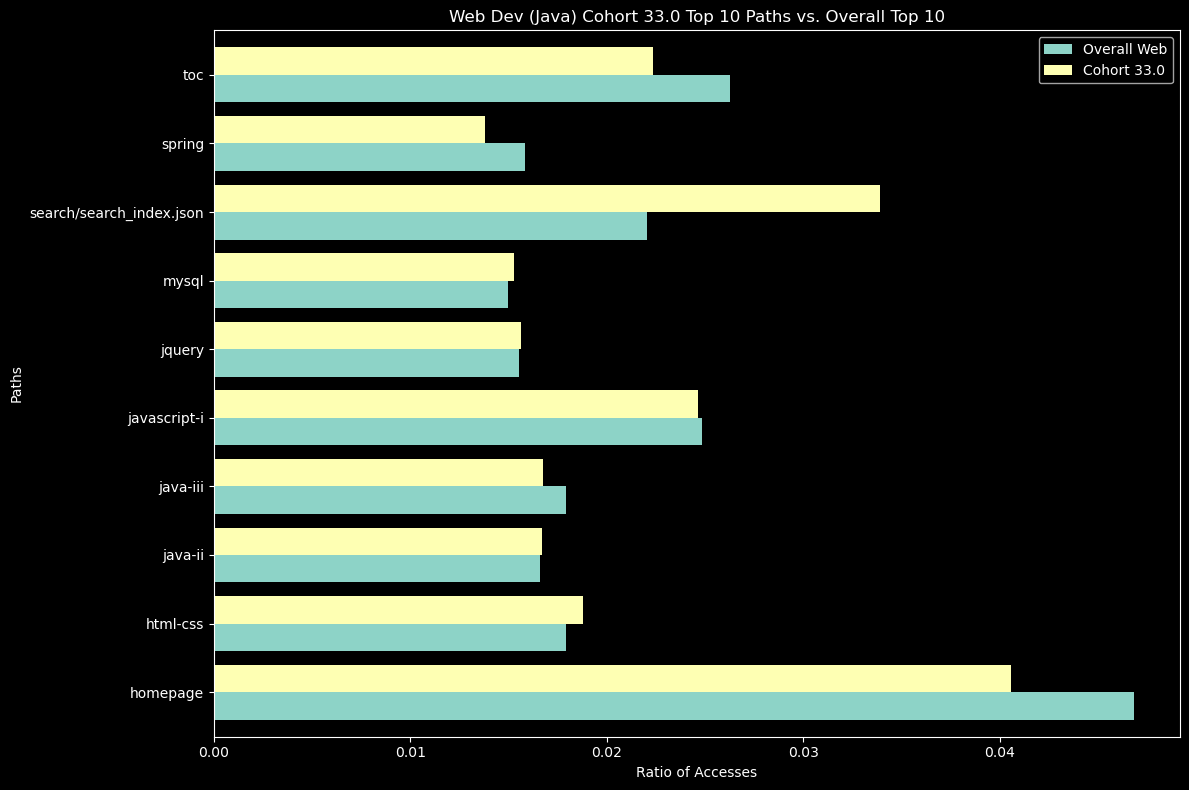

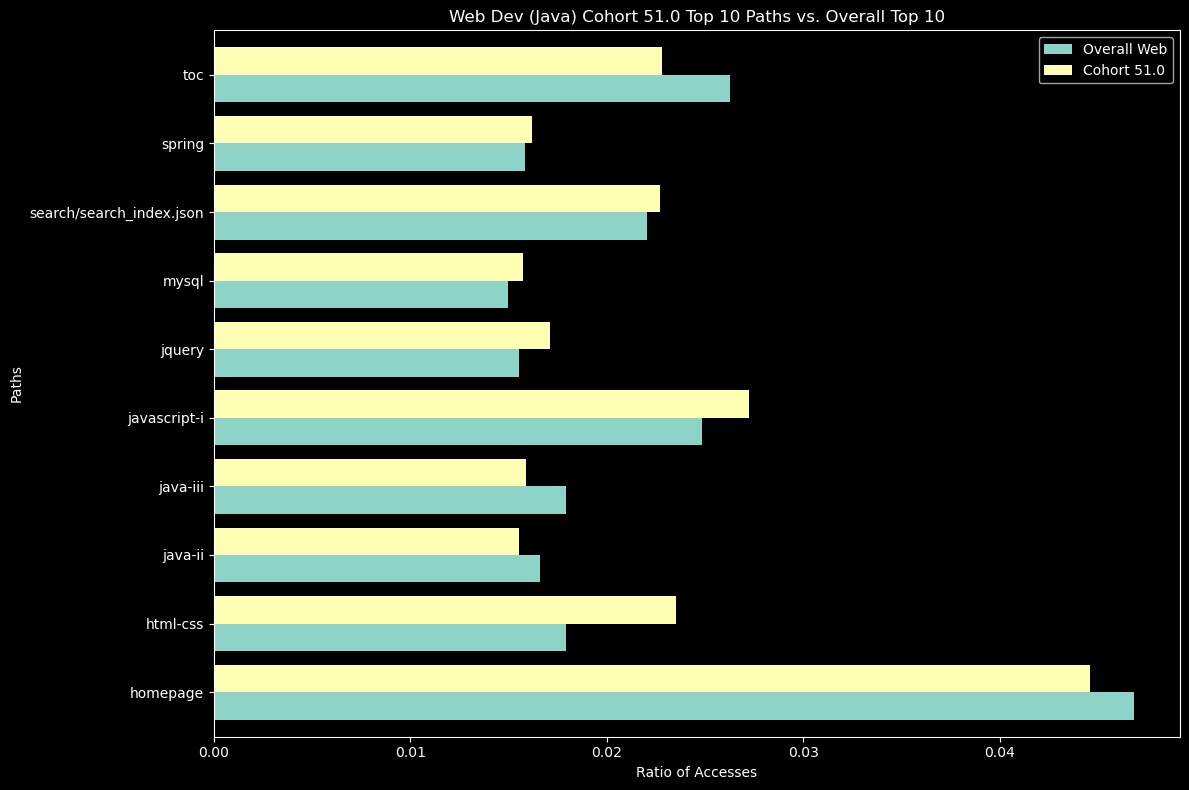

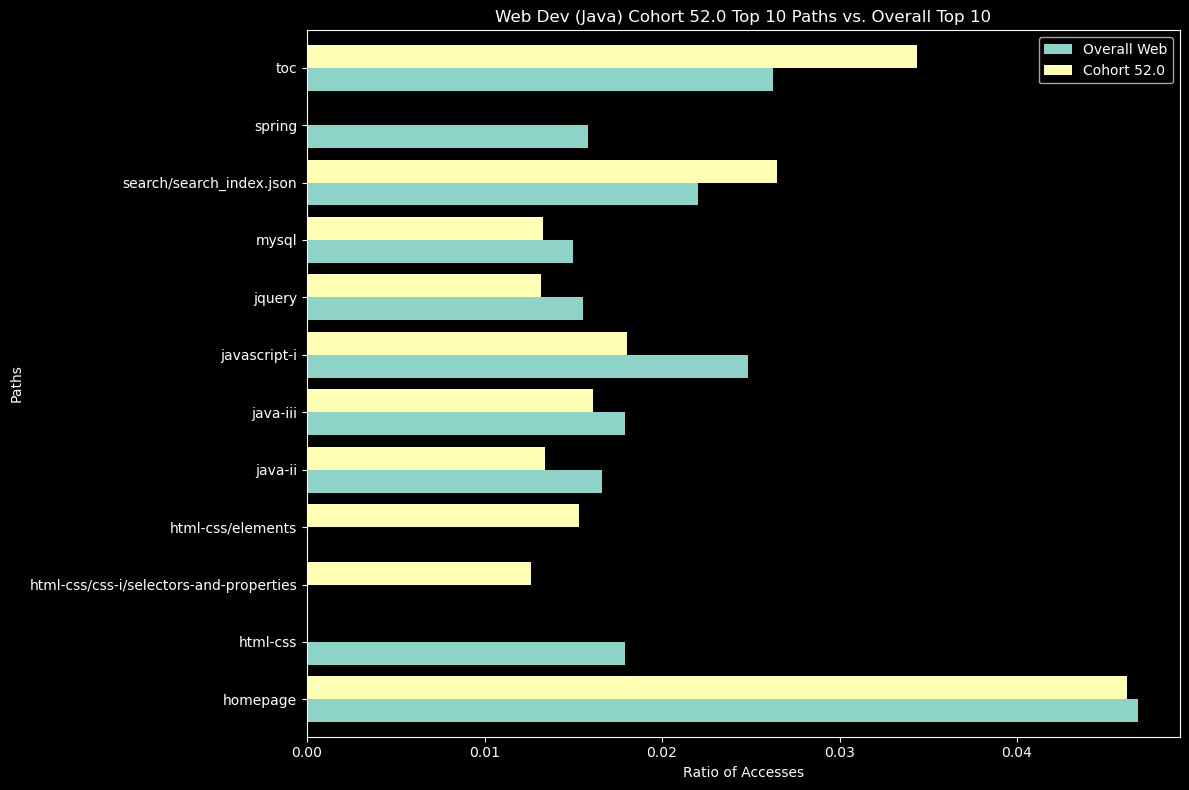

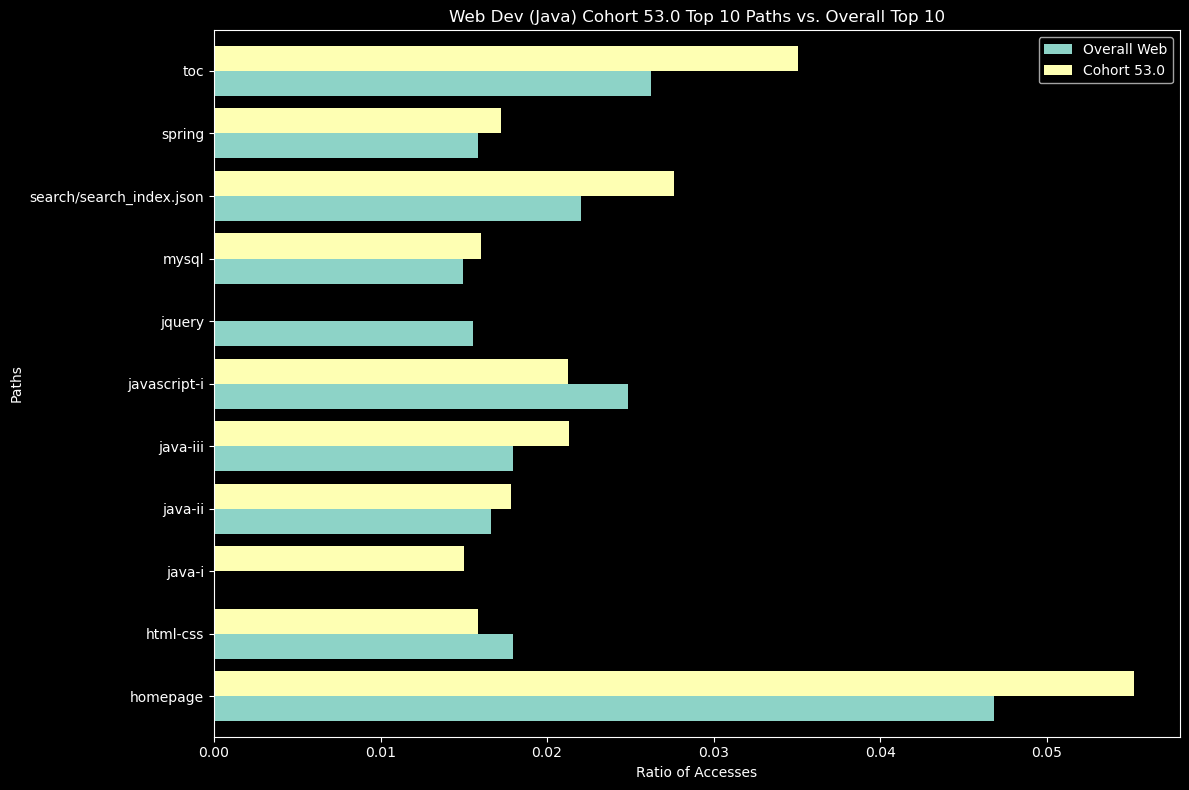

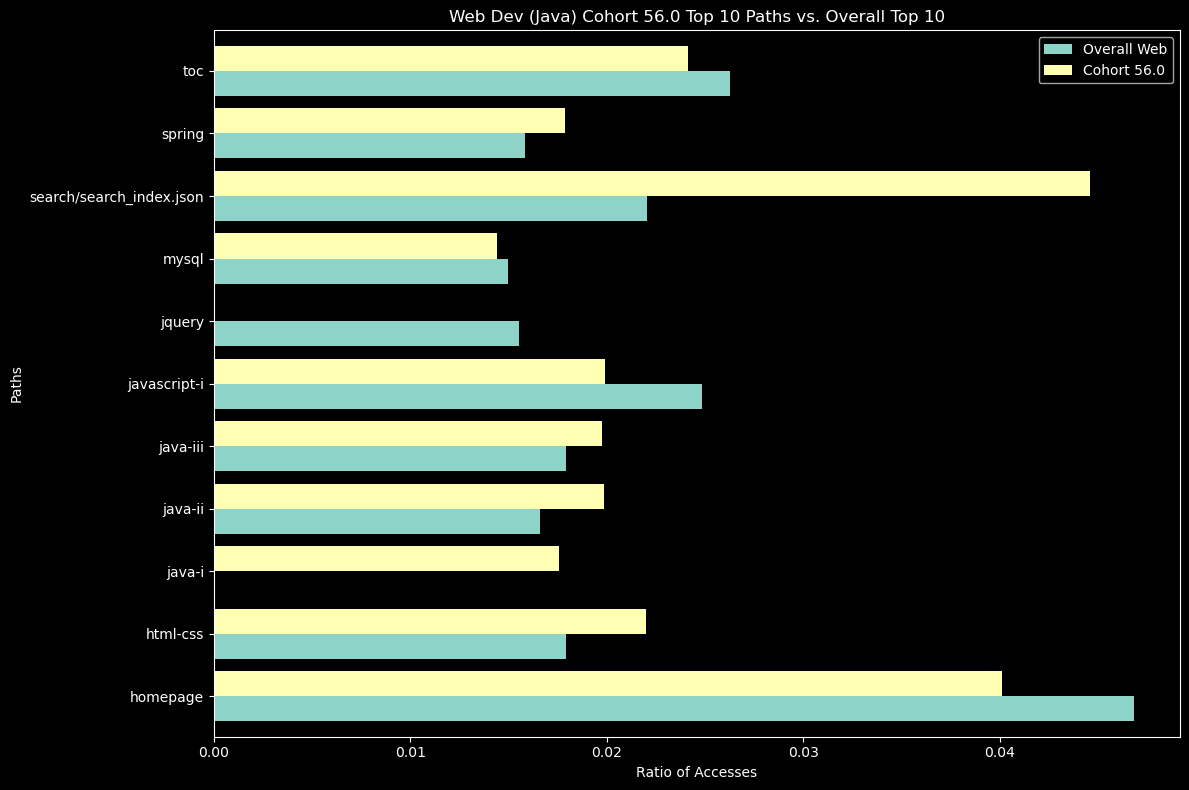

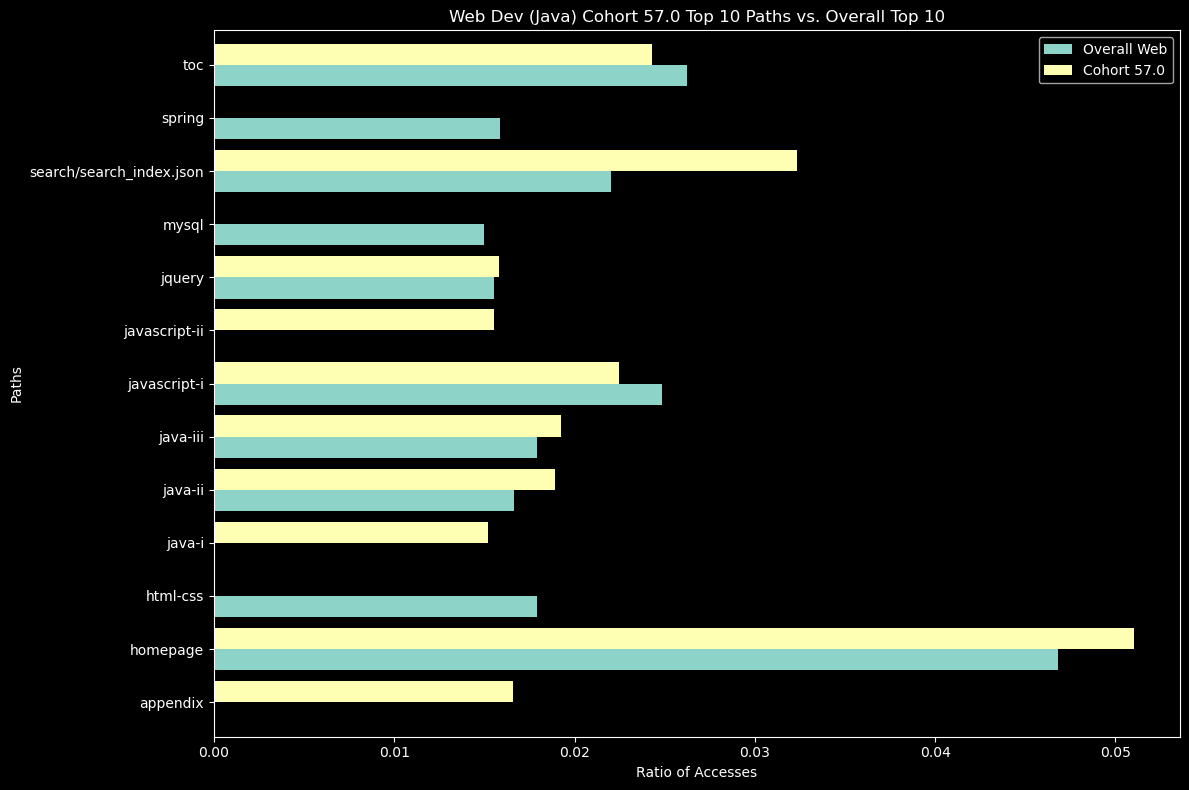

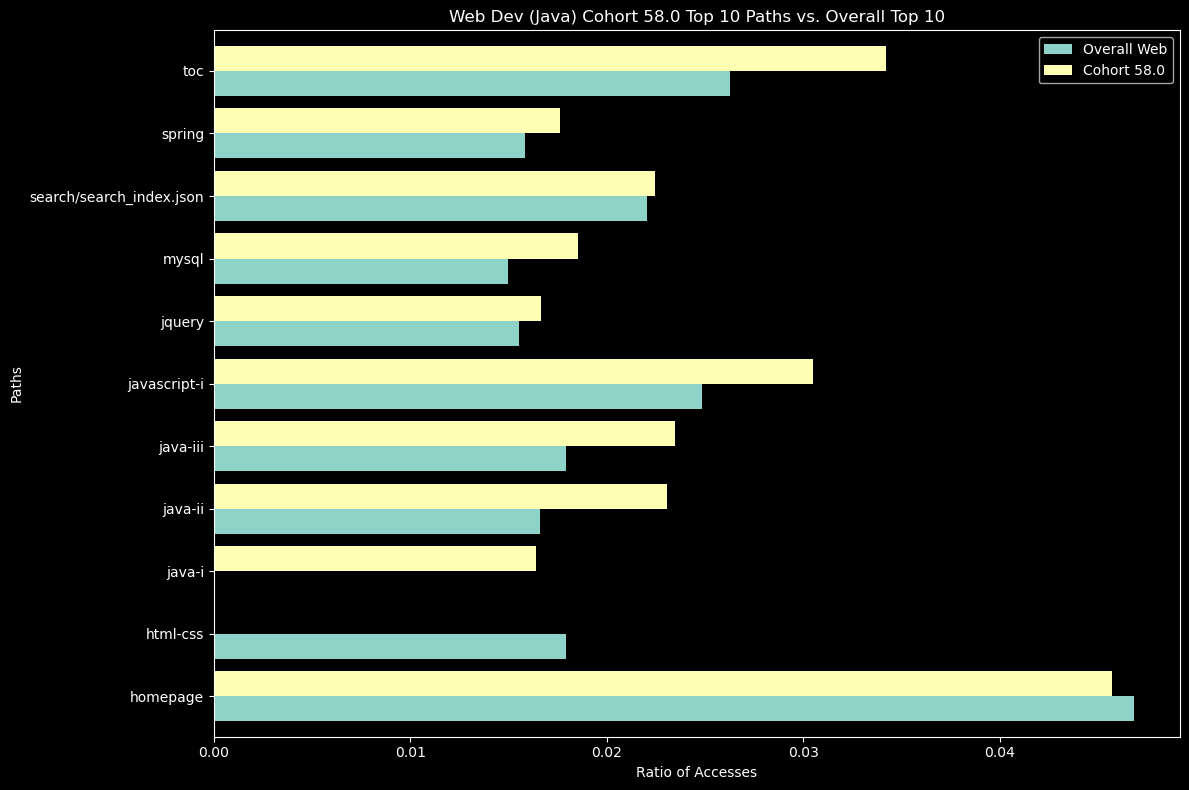

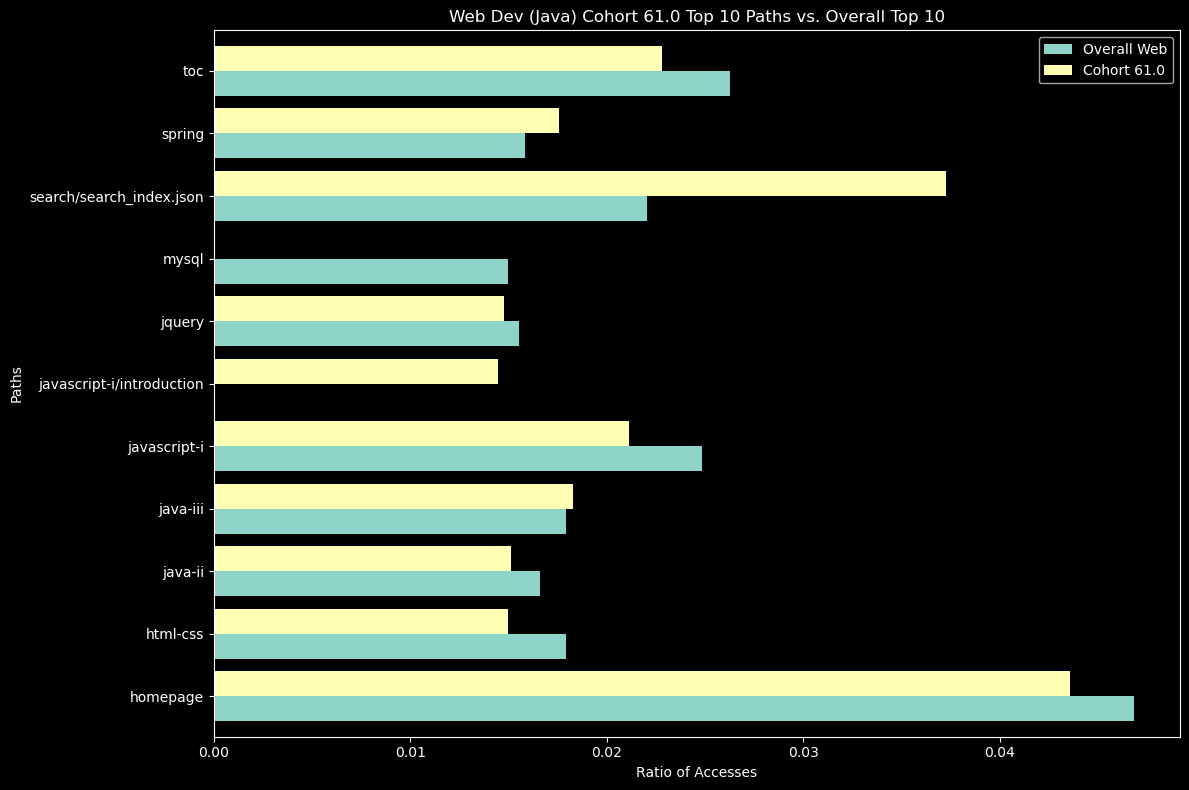

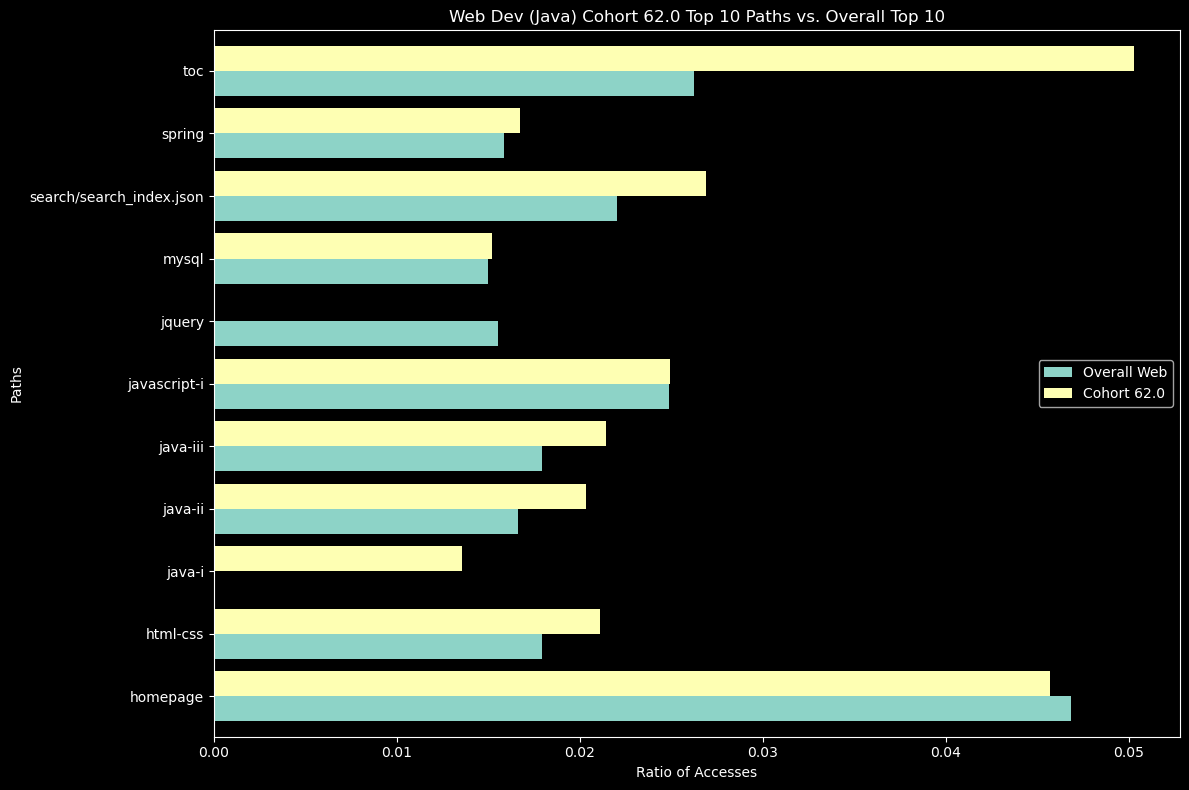

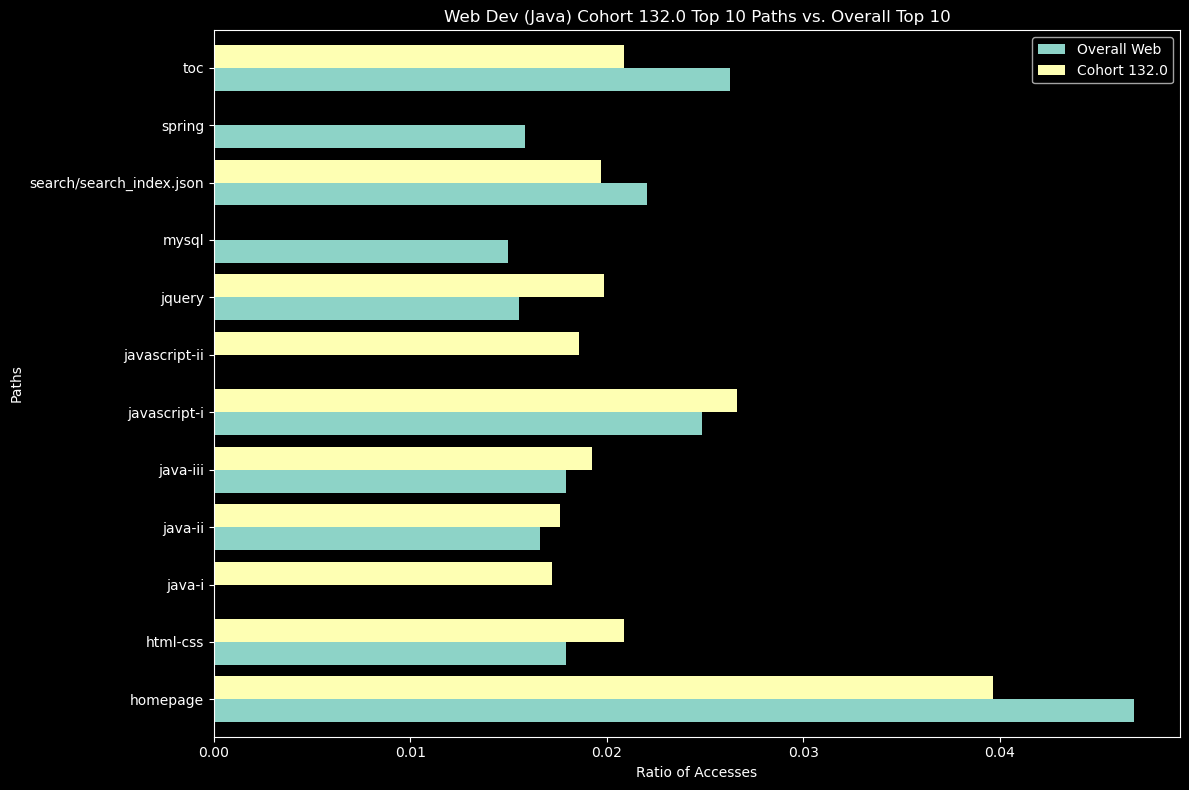

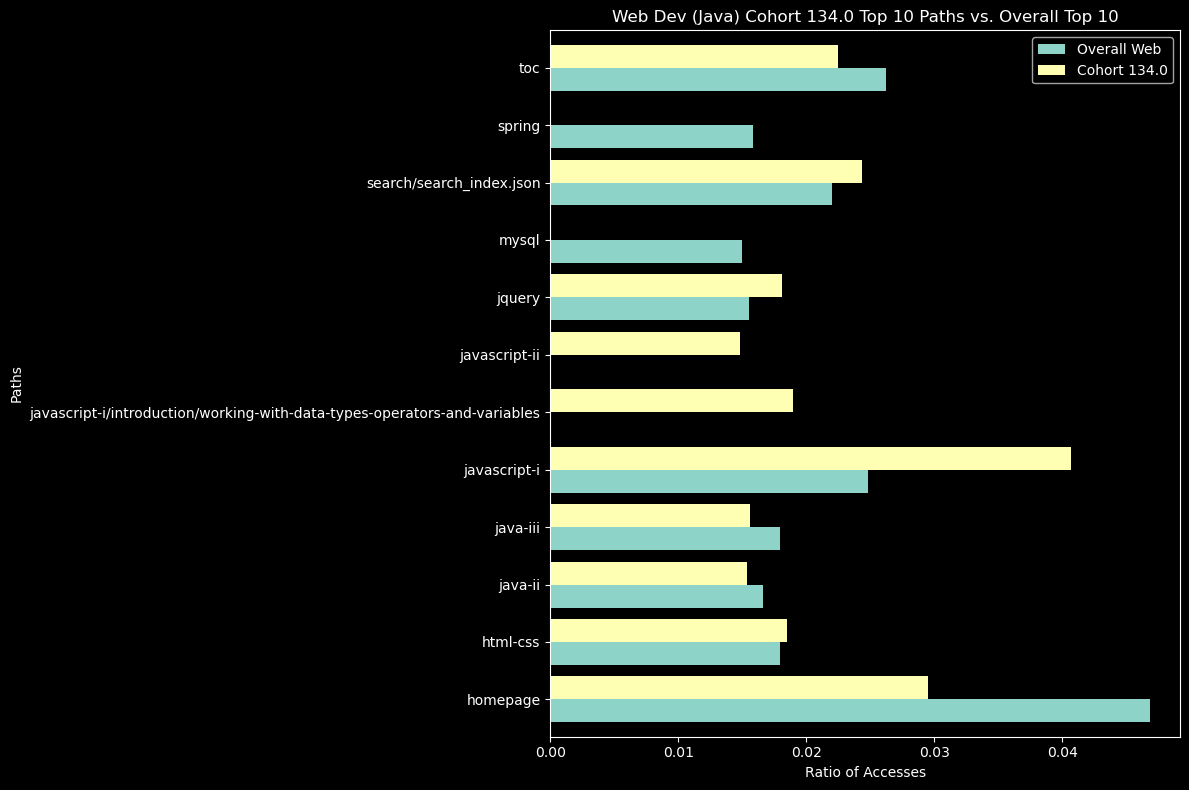

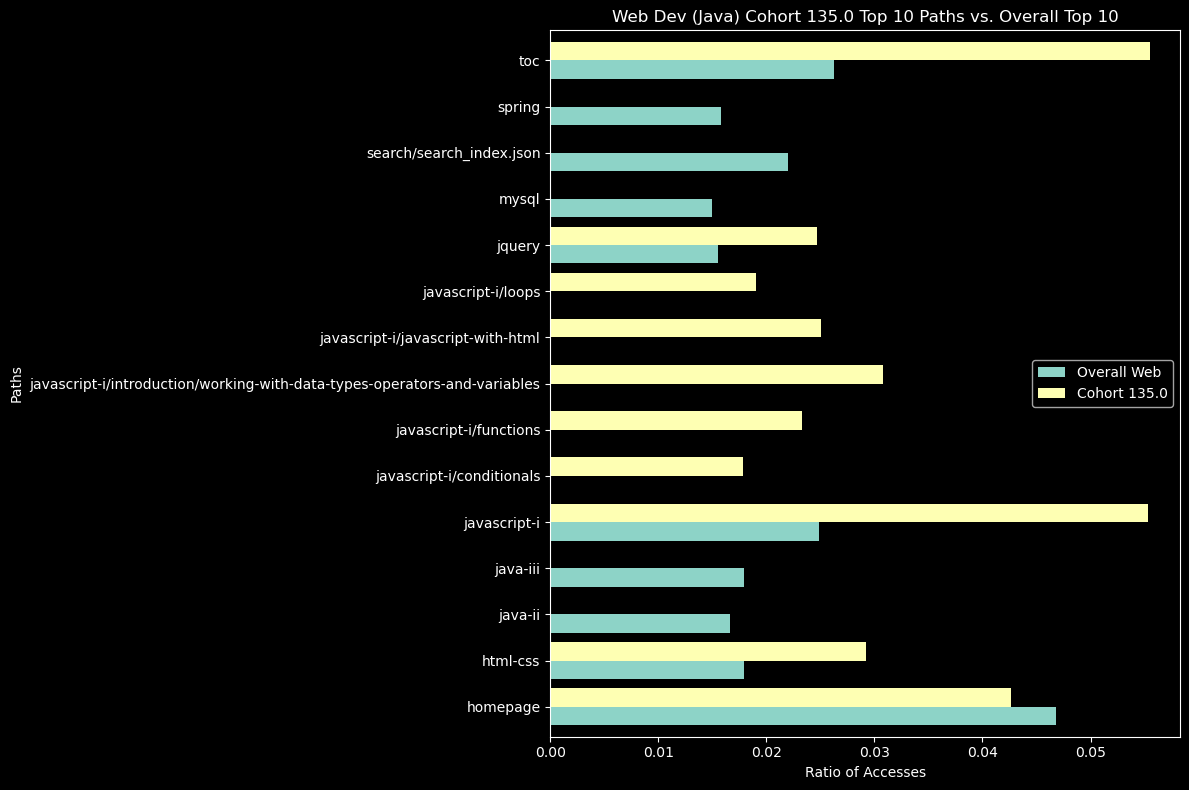

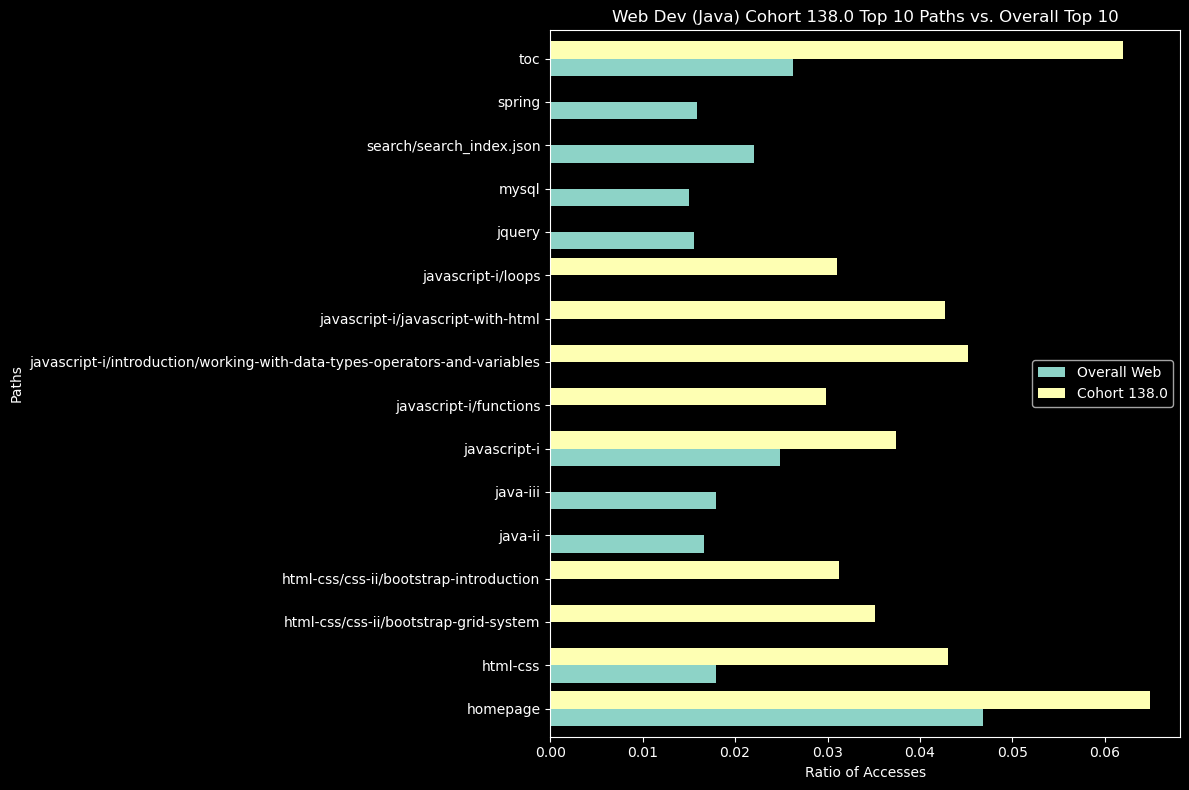

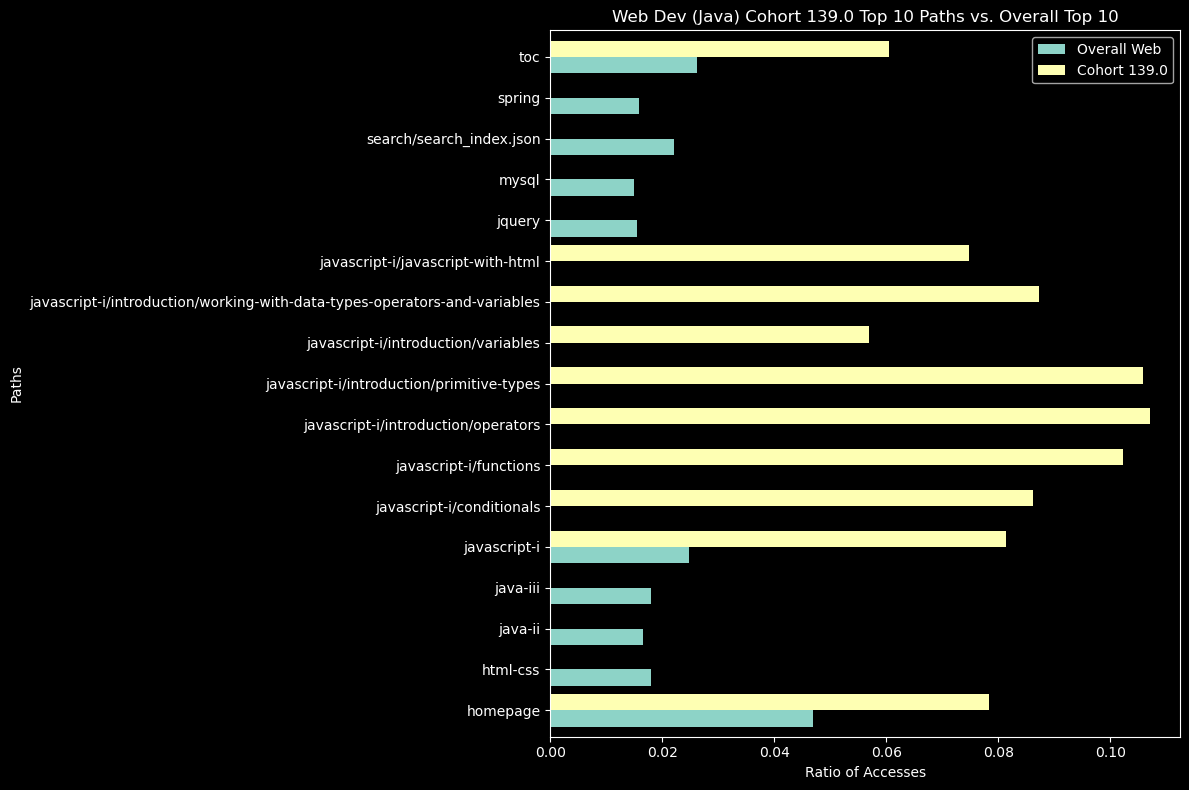

In [54]:
topx = 10

# Get the counts for the overall top X paths for 'web'
overall_top_counts = webjava['path'].value_counts(normalize=True).head(topx)

# For each cohort, plot their top X paths alongside the overall top X
for cohort, group in webjava.groupby('cohort_id'):
    cohort_top_10 = group['path'].value_counts(normalize=True).head(topx)
    
    # Create a combined dataframe for plotting
    df2 = pd.DataFrame({
        'Overall Web': overall_top_counts,
        f'Cohort {cohort}': cohort_top_10
    })
    
    # Plot
    ax = df2.plot(kind='barh', figsize=(12, 8), width=0.8)
    ax.set_title(f"Web Dev (Java) Cohort {cohort} Top {topx} Paths vs. Overall Top {topx}")
    ax.set_xlabel("Ratio of Accesses")
    ax.set_ylabel("Paths")
    plt.tight_layout()
    plt.show()


#### Web Dev PHP

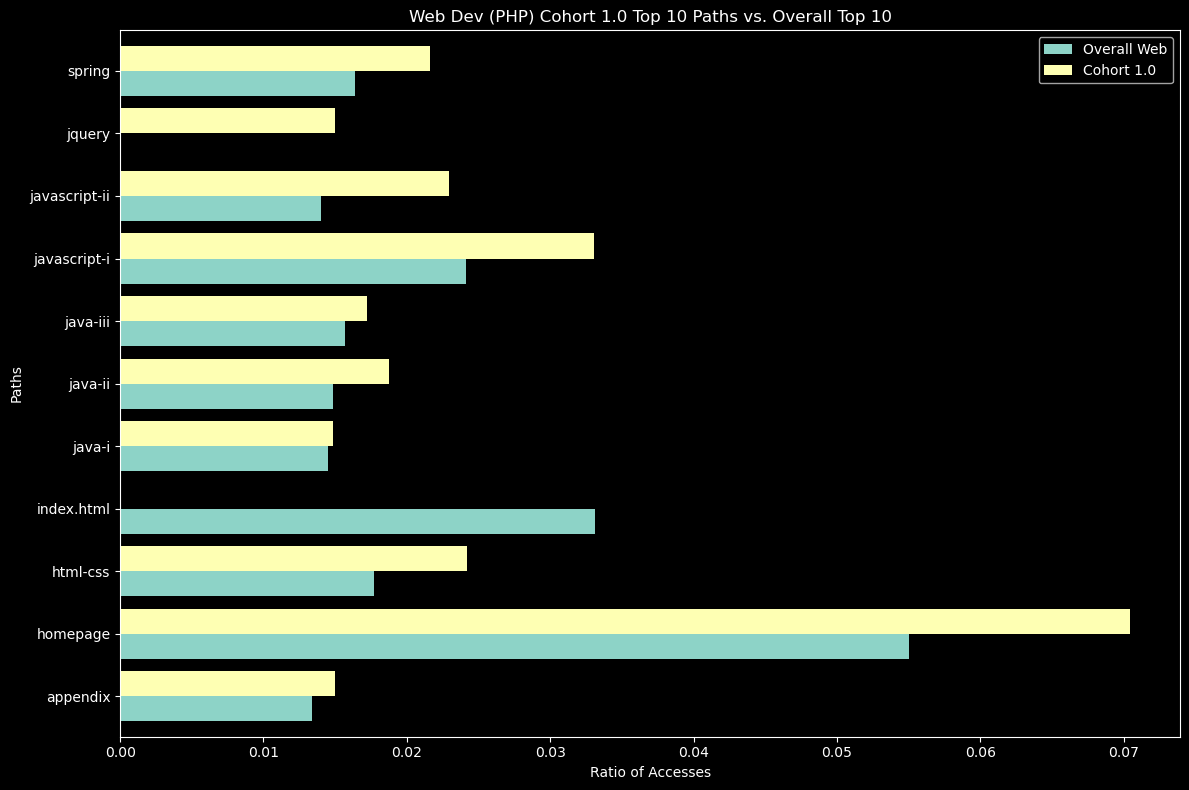

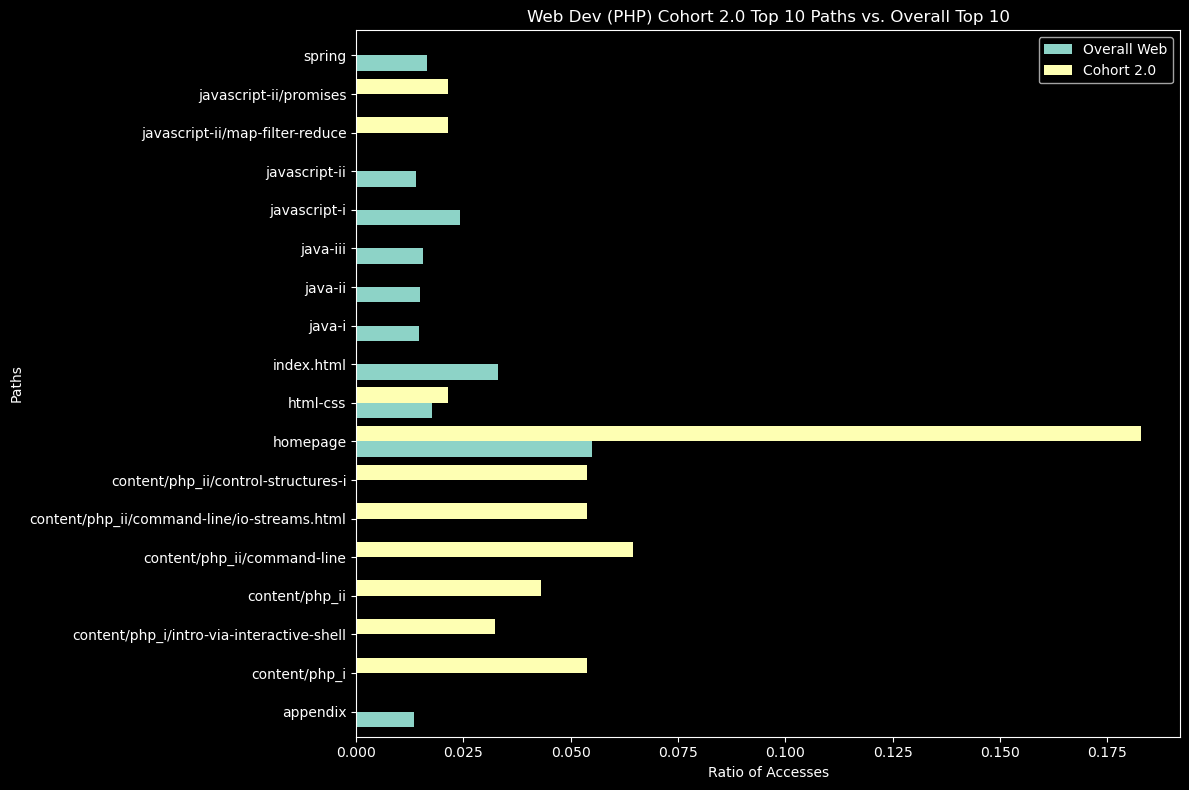

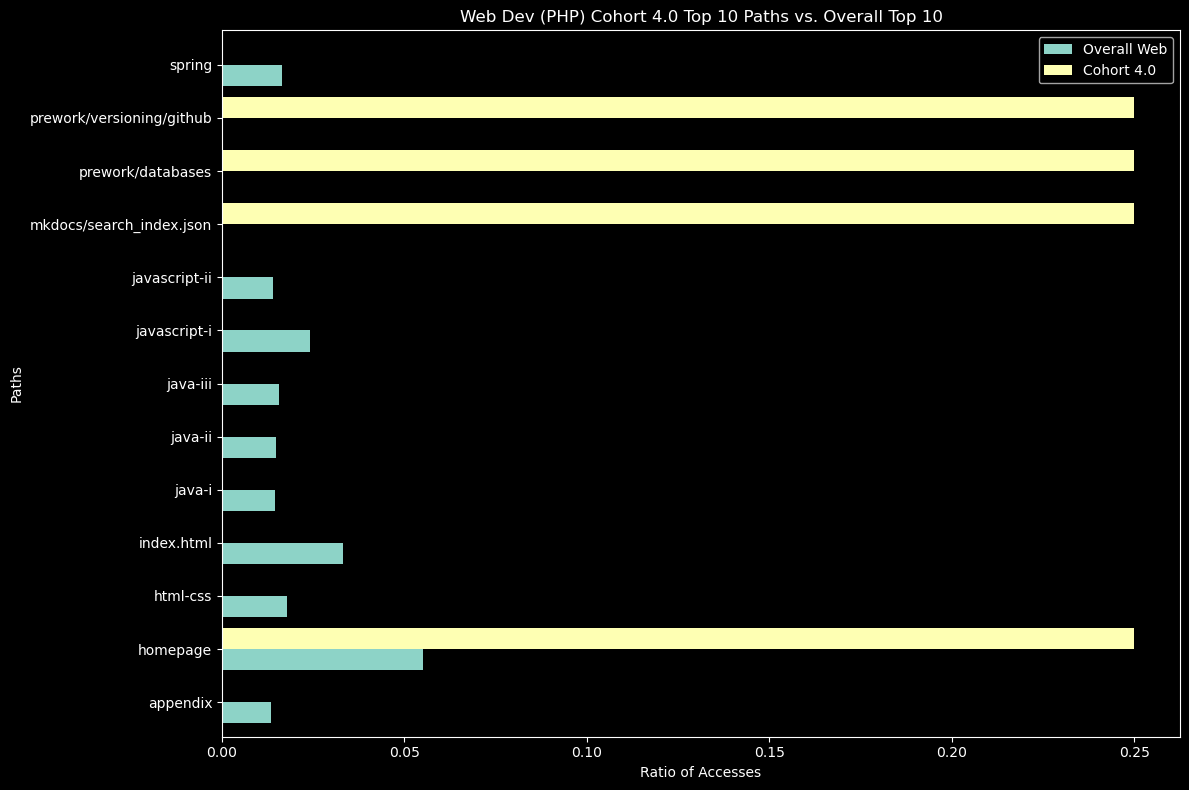

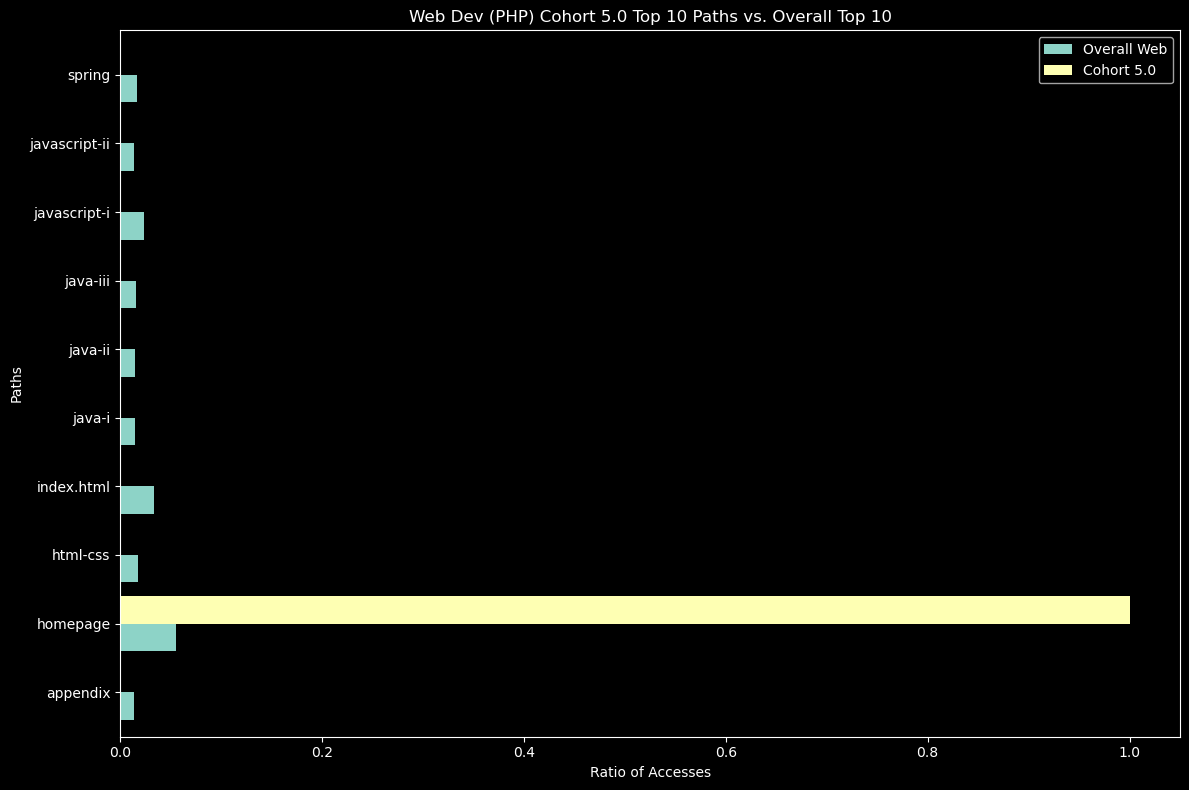

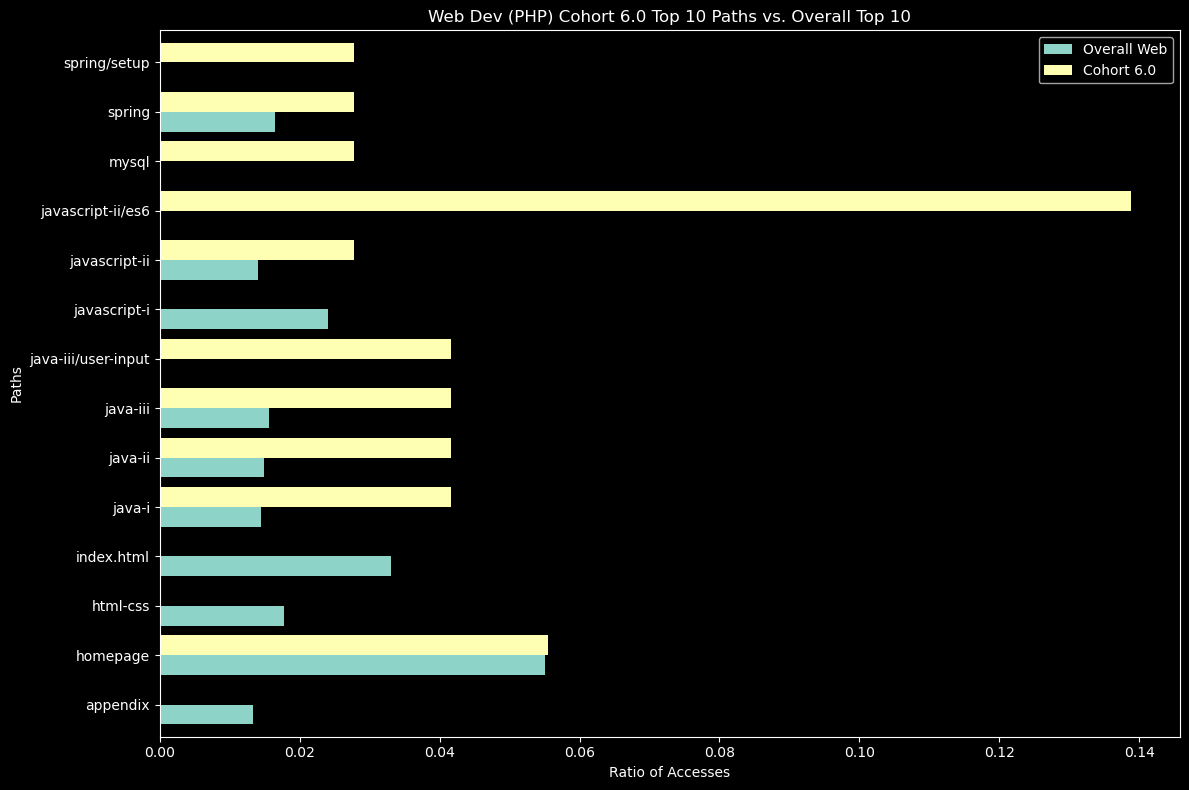

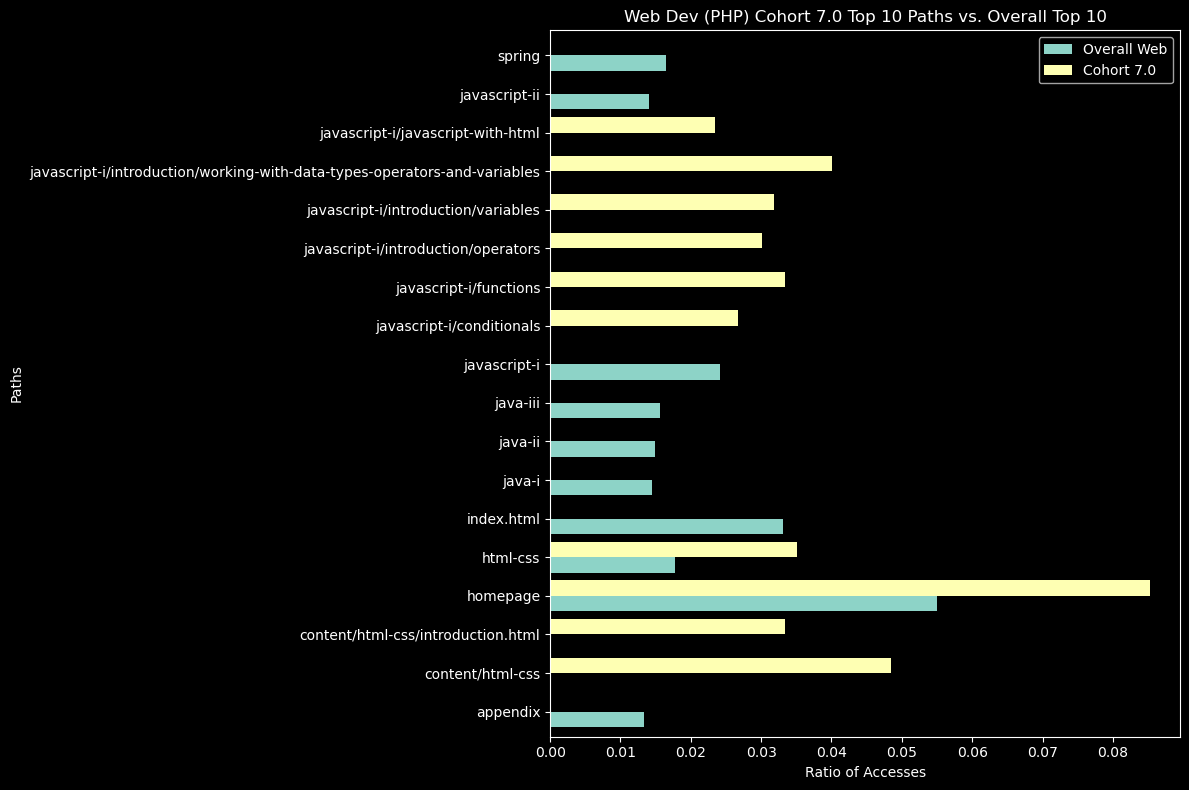

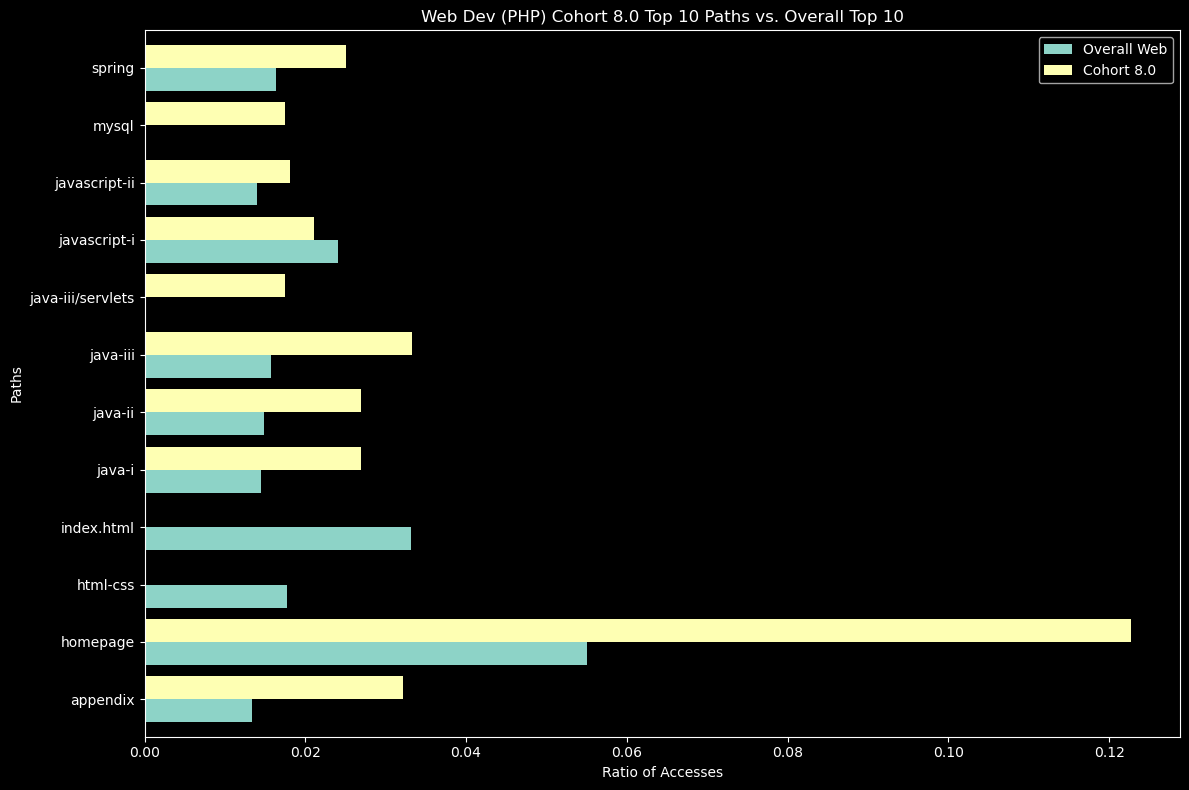

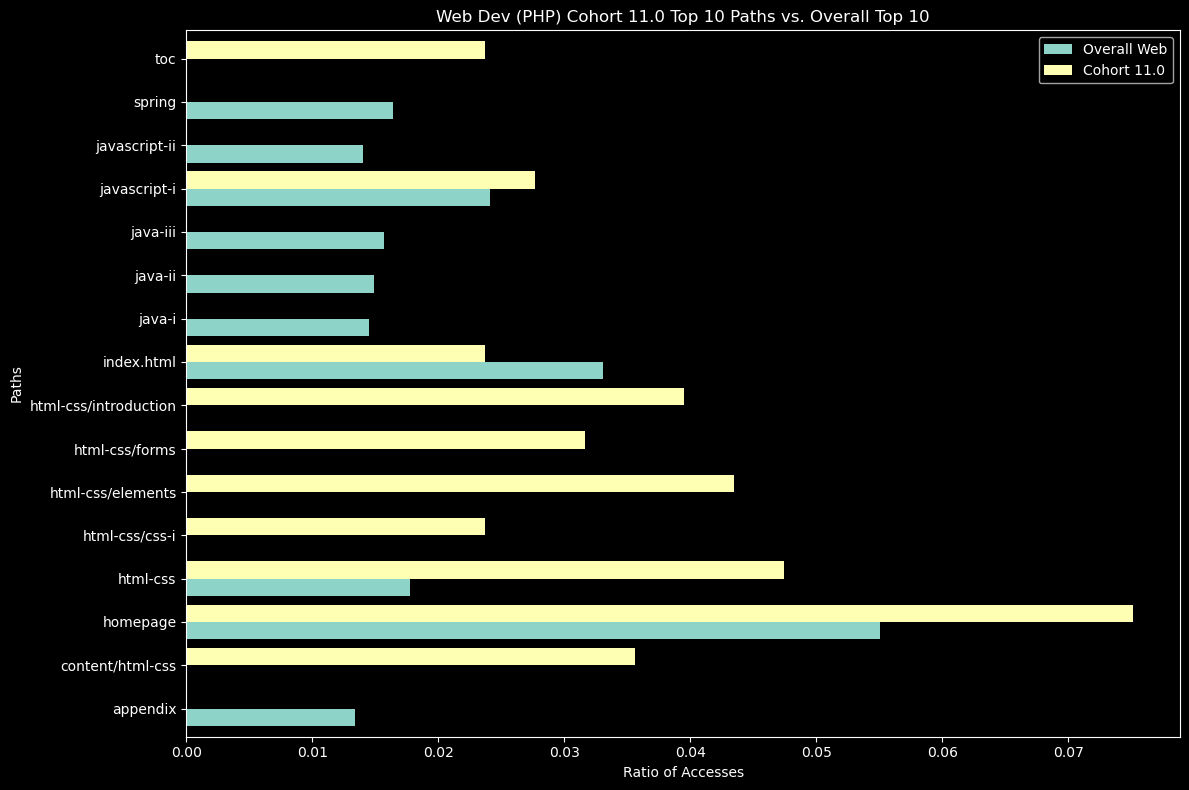

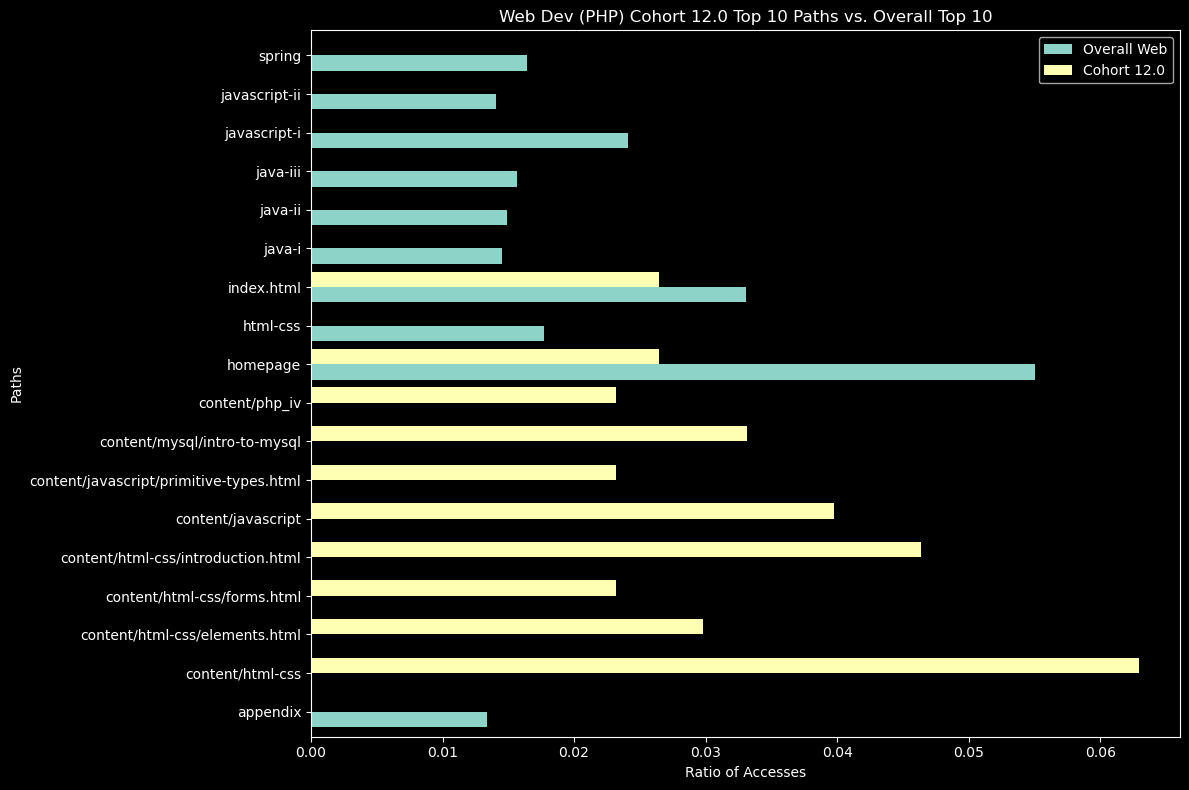

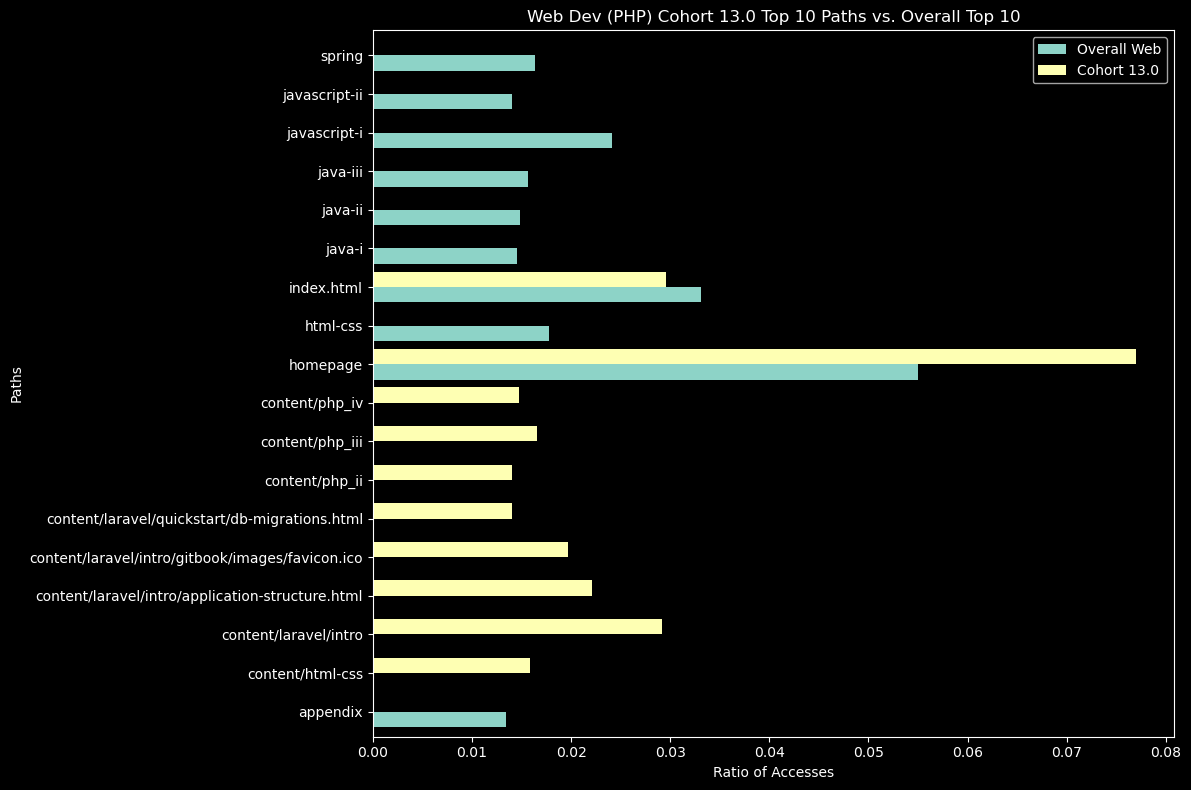

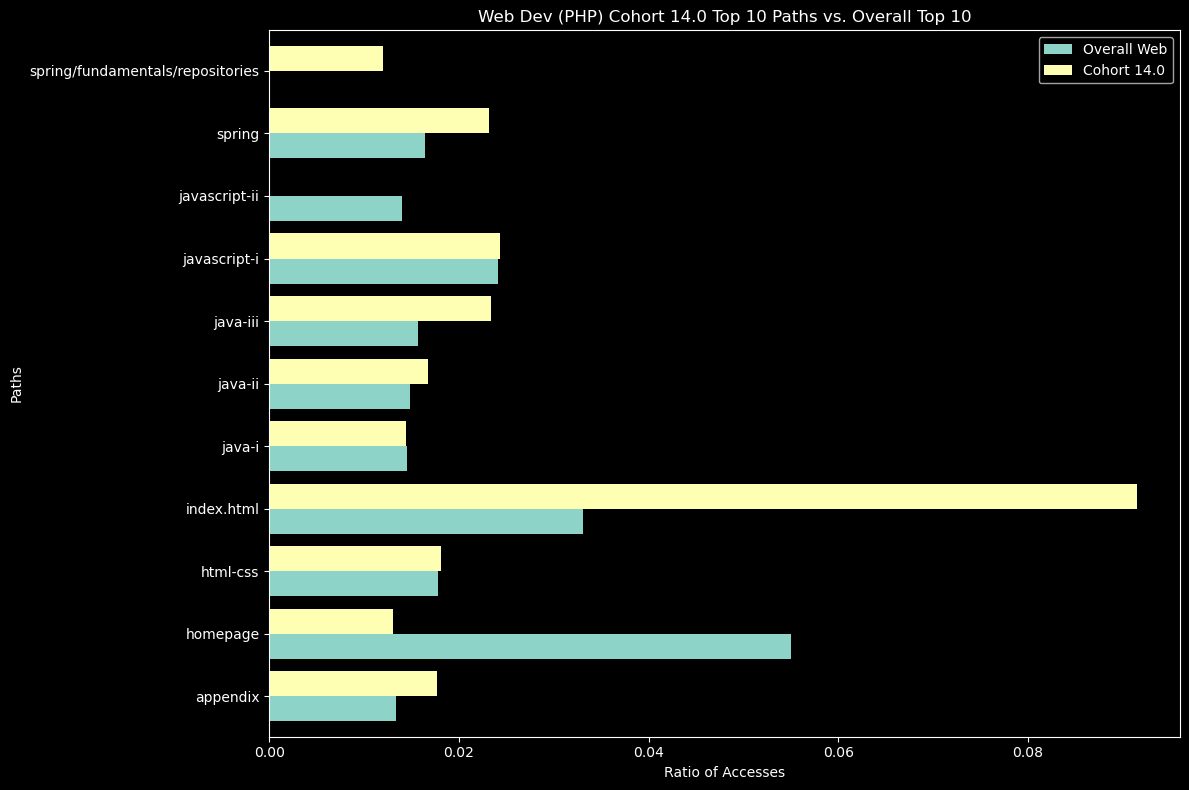

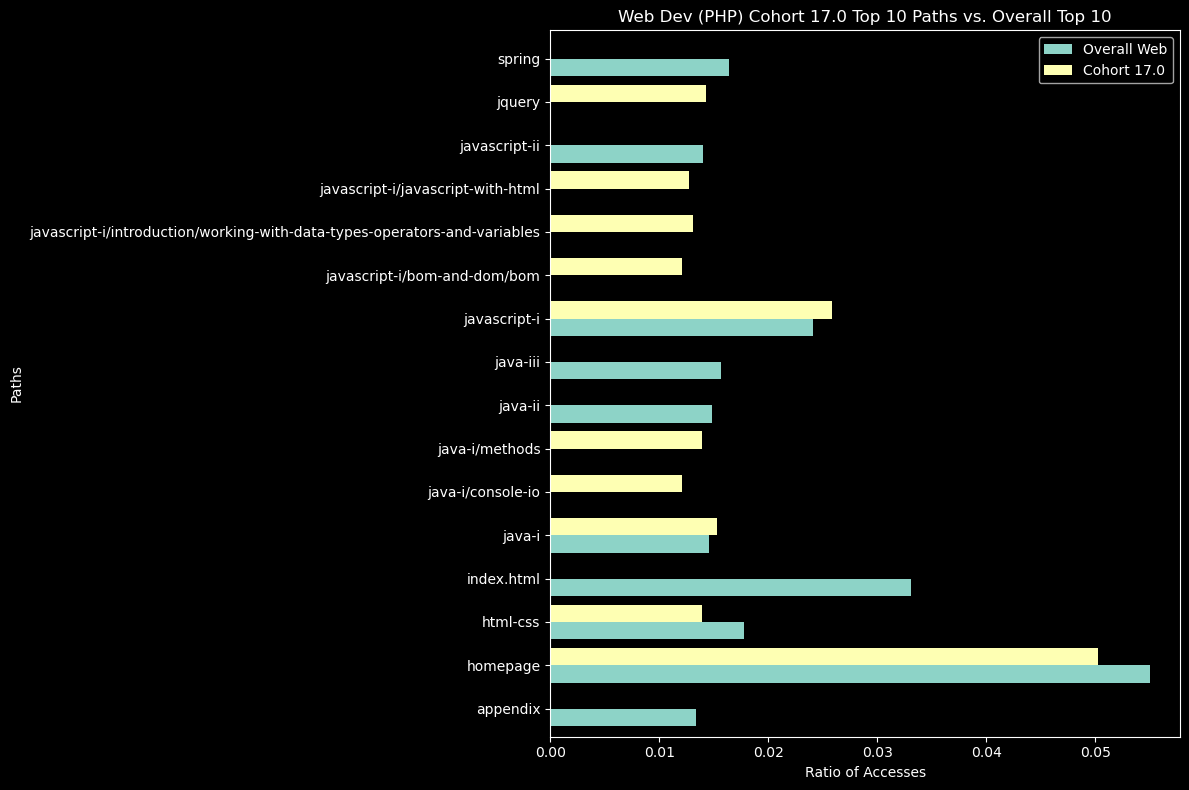

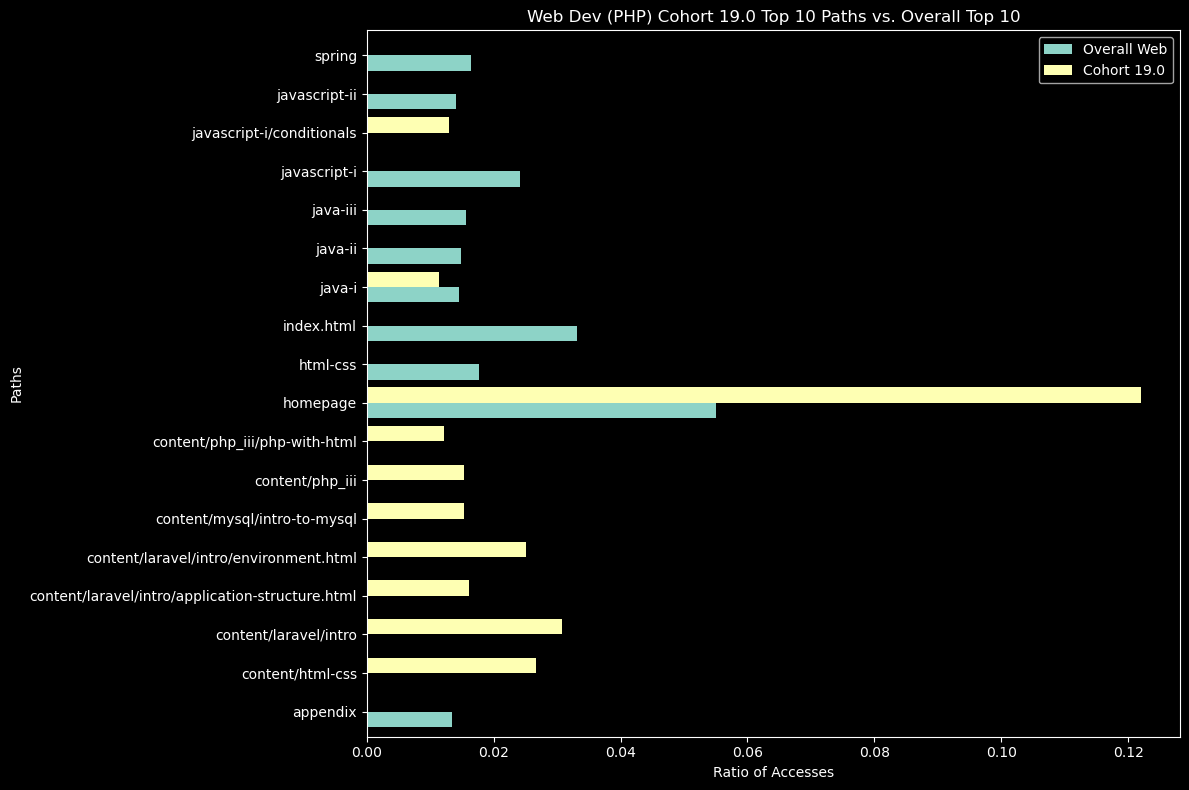

In [55]:
topx = 10

# Get the counts for the overall top X paths for 'web'
overall_top_counts = webphp['path'].value_counts(normalize=True).head(topx)

# For each cohort, plot their top X paths alongside the overall top X
for cohort, group in webphp.groupby('cohort_id'):
    cohort_top_10 = group['path'].value_counts(normalize=True).head(topx)
    
    # Create a combined dataframe for plotting
    df2 = pd.DataFrame({
        'Overall Web': overall_top_counts,
        f'Cohort {cohort}': cohort_top_10
    })
    
    # Plot
    ax = df2.plot(kind='barh', figsize=(12, 8), width=0.8)
    ax.set_title(f"Web Dev (PHP) Cohort {cohort} Top {topx} Paths vs. Overall Top {topx}")
    ax.set_xlabel("Ratio of Accesses")
    ax.set_ylabel("Paths")
    plt.tight_layout()
    plt.show()


#### Web Dev Front End

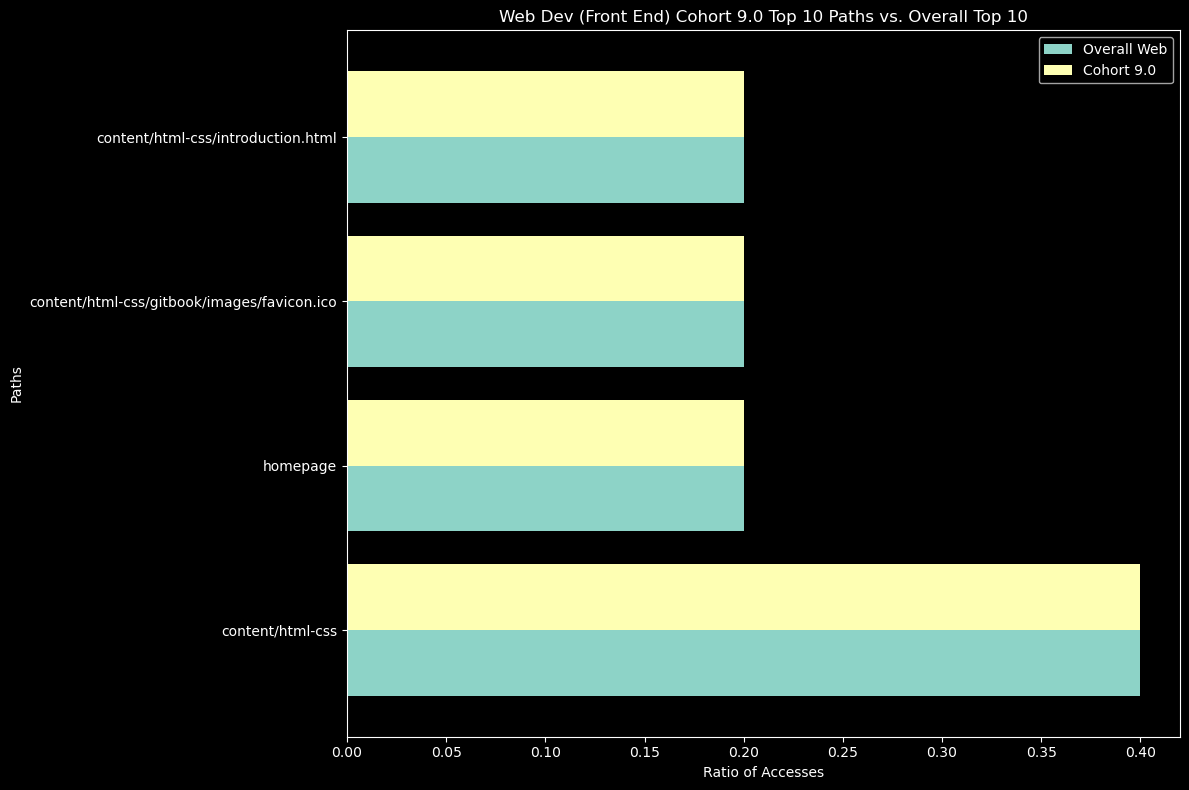

In [56]:
topx = 10

# Get the counts for the overall top X paths for 'web'
overall_top_counts = webfront['path'].value_counts(normalize=True).head(topx)

# For each cohort, plot their top X paths alongside the overall top X
for cohort, group in webfront.groupby('cohort_id'):
    cohort_top_10 = group['path'].value_counts(normalize=True).head(topx)
    
    # Create a combined dataframe for plotting
    df2 = pd.DataFrame({
        'Overall Web': overall_top_counts,
        f'Cohort {cohort}': cohort_top_10
    })
    
    # Plot
    ax = df2.plot(kind='barh', figsize=(12, 8), width=0.8)
    ax.set_title(f"Web Dev (Front End) Cohort {cohort} Top {topx} Paths vs. Overall Top {topx}")
    ax.set_xlabel("Ratio of Accesses")
    ax.set_ylabel("Paths")
    plt.tight_layout()
    plt.show()


#### Data Cohorts

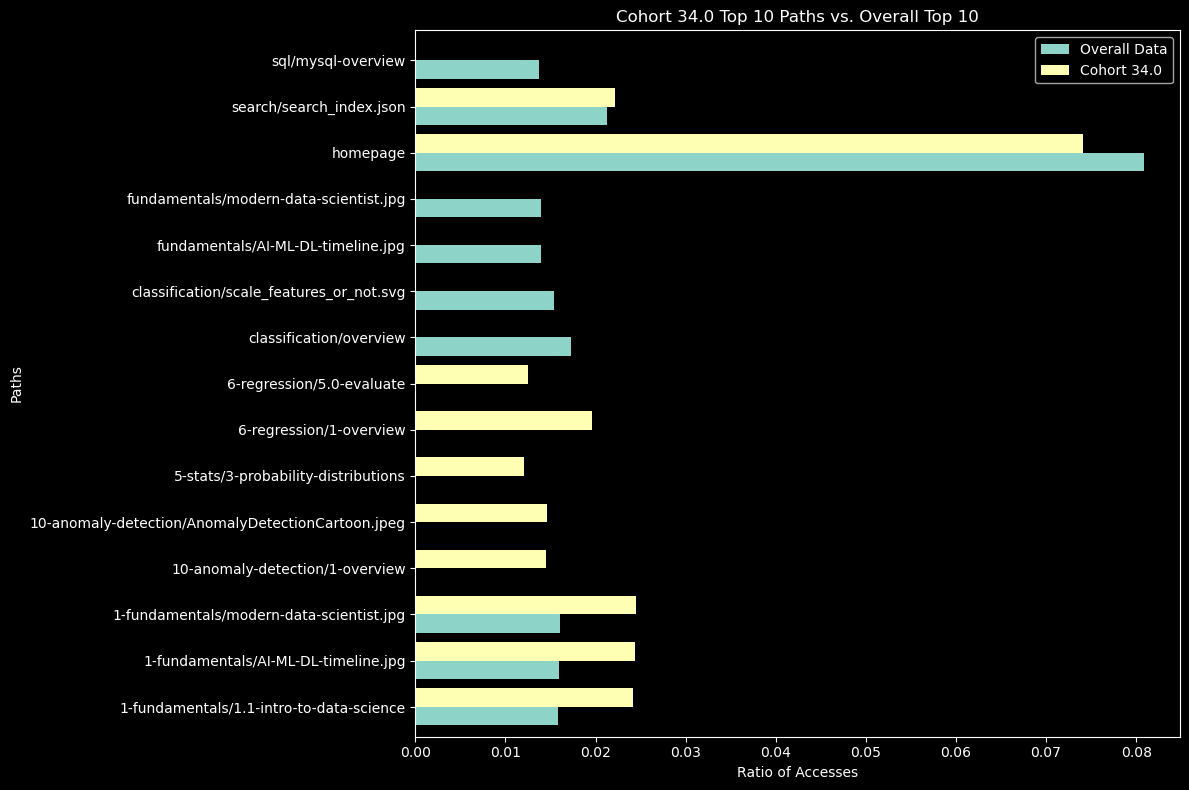

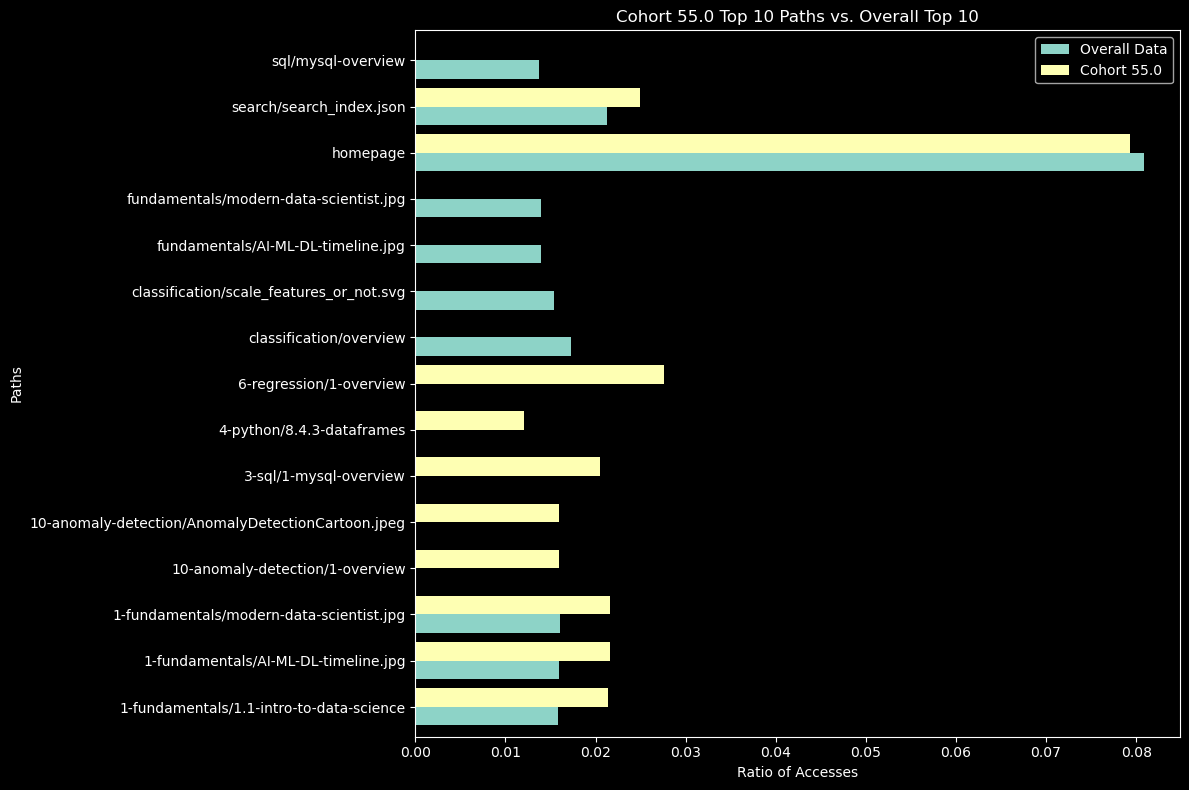

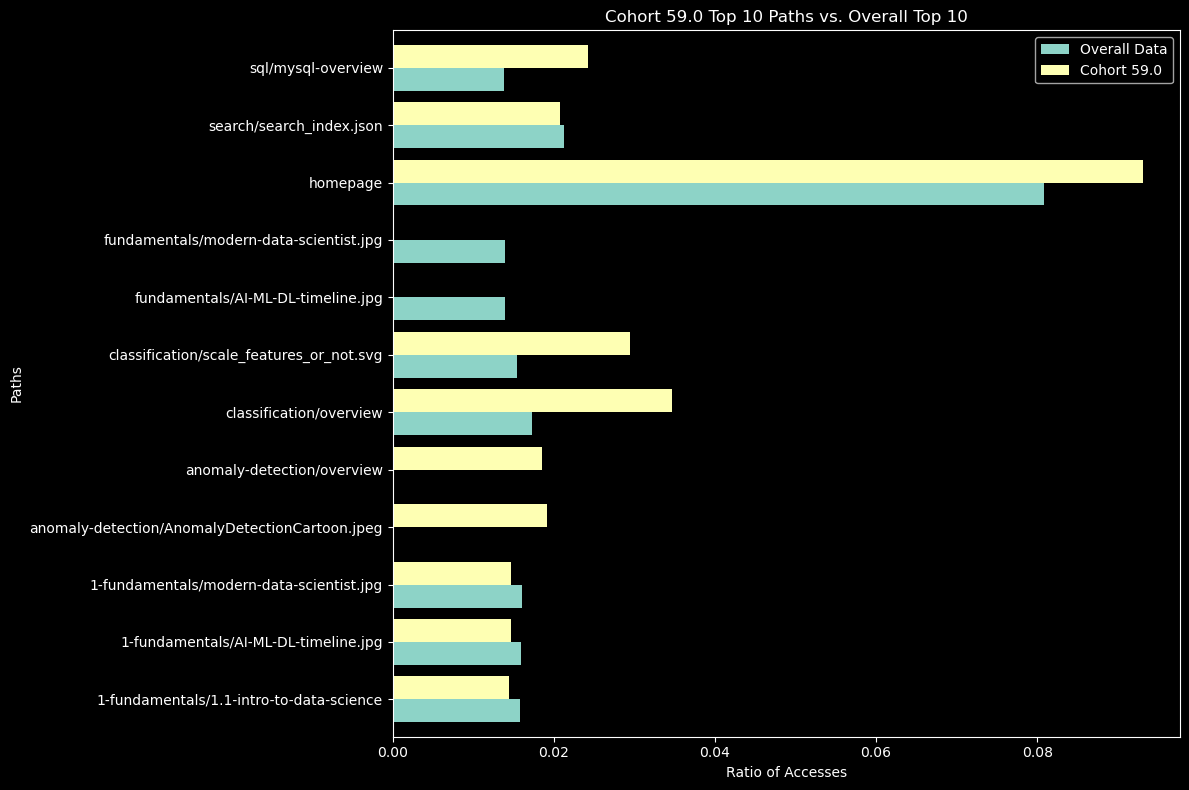

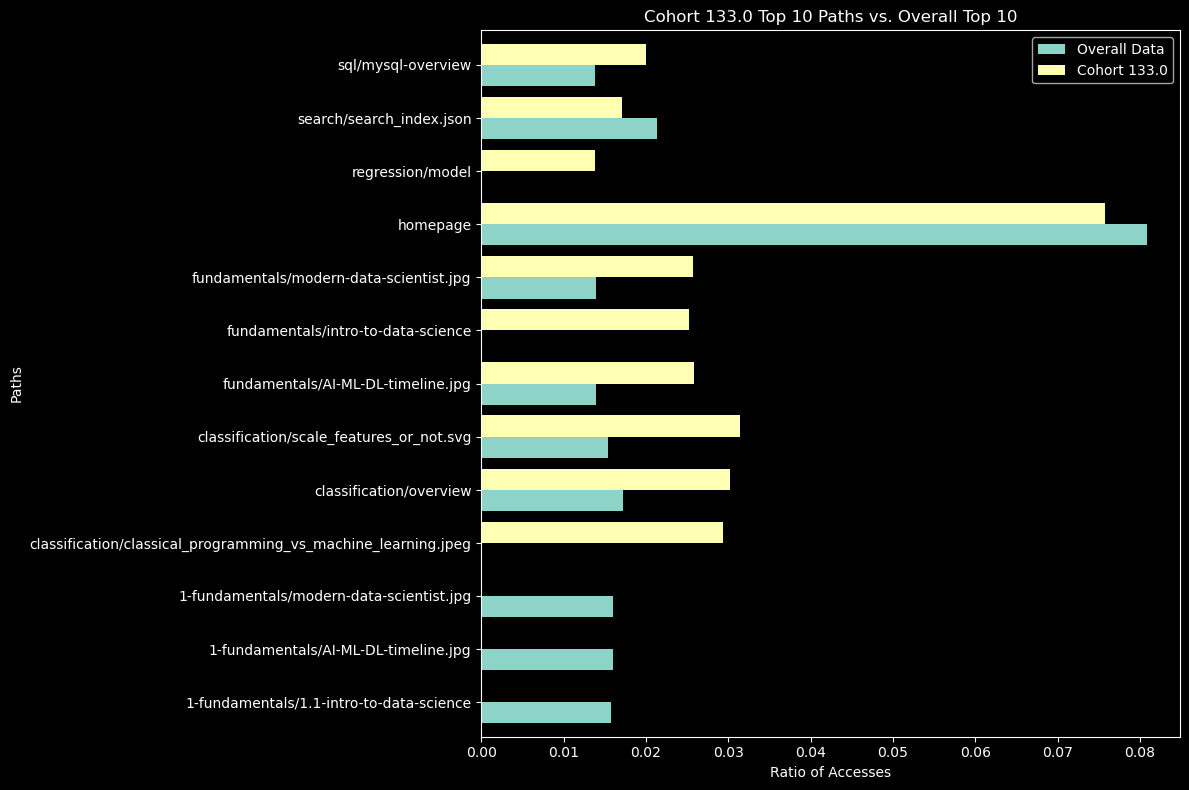

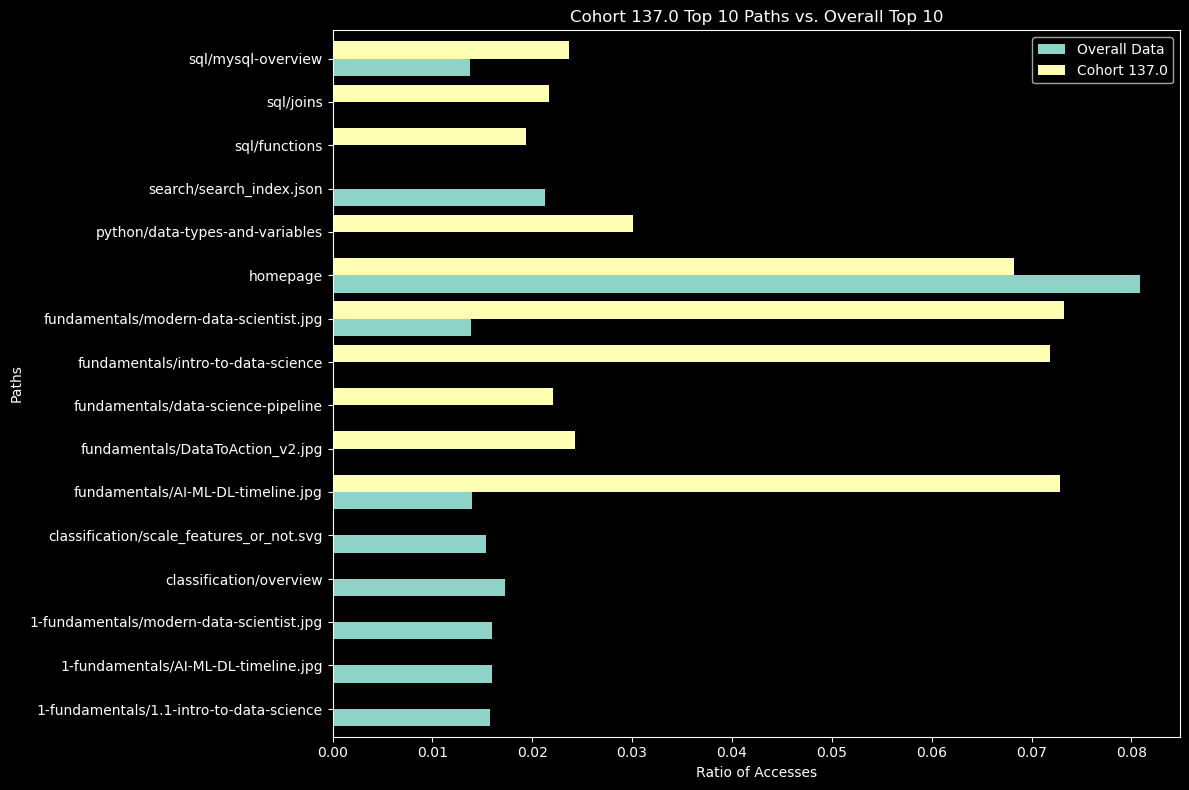

In [91]:
topx = 10

# Get the counts for the overall top X paths for 'data'
overall_top_counts = data['path'].value_counts(normalize=True).head(topx)

# For each cohort, plot their top X paths alongside the overall top X
for cohort, group in data.groupby('cohort_id'):
    cohort_top_10 = group['path'].value_counts(normalize=True).head(topx)
    
    # Create a combined dataframe for plotting
    df3 = pd.DataFrame({
        'Overall Data': overall_top_counts,
        f'Cohort {cohort}': cohort_top_10
    })
    
    # Plot
    ax = df3.plot(kind='barh', figsize=(12, 8), width=0.8)
    ax.set_title(f"Cohort {cohort} Top {topx} Paths vs. Overall Top {topx}")
    ax.set_xlabel("Ratio of Accesses")
    ax.set_ylabel("Paths")
    plt.tight_layout()
    plt.show()



### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?


In [37]:
# Filter the dataframe to only include rows where the access date is between the cohort's start and end dates
filtered_data = df[df.apply(lambda x: x['class_start'] <= x['datetime'] <= x['class_end'], axis=1)]

# Count the number of times each user_id appears in the filtered dataframe
user_counts = filtered_data['user_id'].value_counts()

# Identify the 10 user IDs with the least counts
bottom_10_users = user_counts.nsmallest(10)
bottom_10_users

user_id
879    1
940    1
918    1
619    1
832    3
278    4
539    5
956    6
812    7
388    8
Name: count, dtype: int64

### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [38]:
# Users Accessing Outside of Cohort Duration
outside_access = df[~df.apply(lambda x: x['class_start'] <= x['datetime'] <= x['class_end'], axis=1)]
outside_users = outside_access['user_id'].value_counts()

# High Request Volume
ip_request_counts = df['source_ip'].value_counts()
high_request_ips = ip_request_counts[ip_request_counts > ip_request_counts.quantile(0.99)]  # IPs with requests in the top 1%

# Access Patterns and Unique Page Access
ip_unique_pages = df.groupby('source_ip')['path'].nunique()
high_unique_page_ips = ip_unique_pages[ip_unique_pages > ip_unique_pages.quantile(0.99)]  # IPs accessing unique pages in the top 1%

# Frequent Access to the Same Page
ip_same_page_counts = df.groupby(['source_ip', 'path']).size()
high_same_page_ips = ip_same_page_counts[ip_same_page_counts > ip_same_page_counts.quantile(0.99)]

# Suspicious IP Addresses
known_ips = df[df['cohort_id'].notna()]['source_ip'].unique()
suspicious_ips = set(df['source_ip'].unique()) - set(known_ips)

outside_users, high_request_ips, high_unique_page_ips, high_same_page_ips, suspicious_ips


(user_id
 11     17913
 64     16322
 53     12329
 314     7783
 1       7404
        ...  
 165        1
 66         1
 163        1
 592        1
 240        1
 Name: count, Length: 664, dtype: int64,
 source_ip
 97.105.19.58       284579
 97.105.19.61        61662
 192.171.117.210      9515
 71.150.217.33        6791
 76.185.145.231       4754
 12.106.208.194       4360
 67.11.50.23          4181
 70.112.179.142       4117
 70.121.183.95        3843
 172.124.67.93        3511
 99.76.233.212        3491
 24.243.67.104        3232
 67.10.174.56         3115
 72.190.174.52        2939
 104.10.49.137        2711
 216.63.31.195        2655
 76.185.131.226       2645
 66.196.21.182        2612
 173.173.115.201      2599
 136.50.32.151        2570
 72.190.235.36        2487
 72.179.164.139       2429
 75.1.166.163         2406
 99.151.201.25        2396
 71.143.82.236        2336
 67.11.136.146        2327
 70.94.168.22         2301
 67.11.146.88         2269
 72.181.127.233       2260
 7

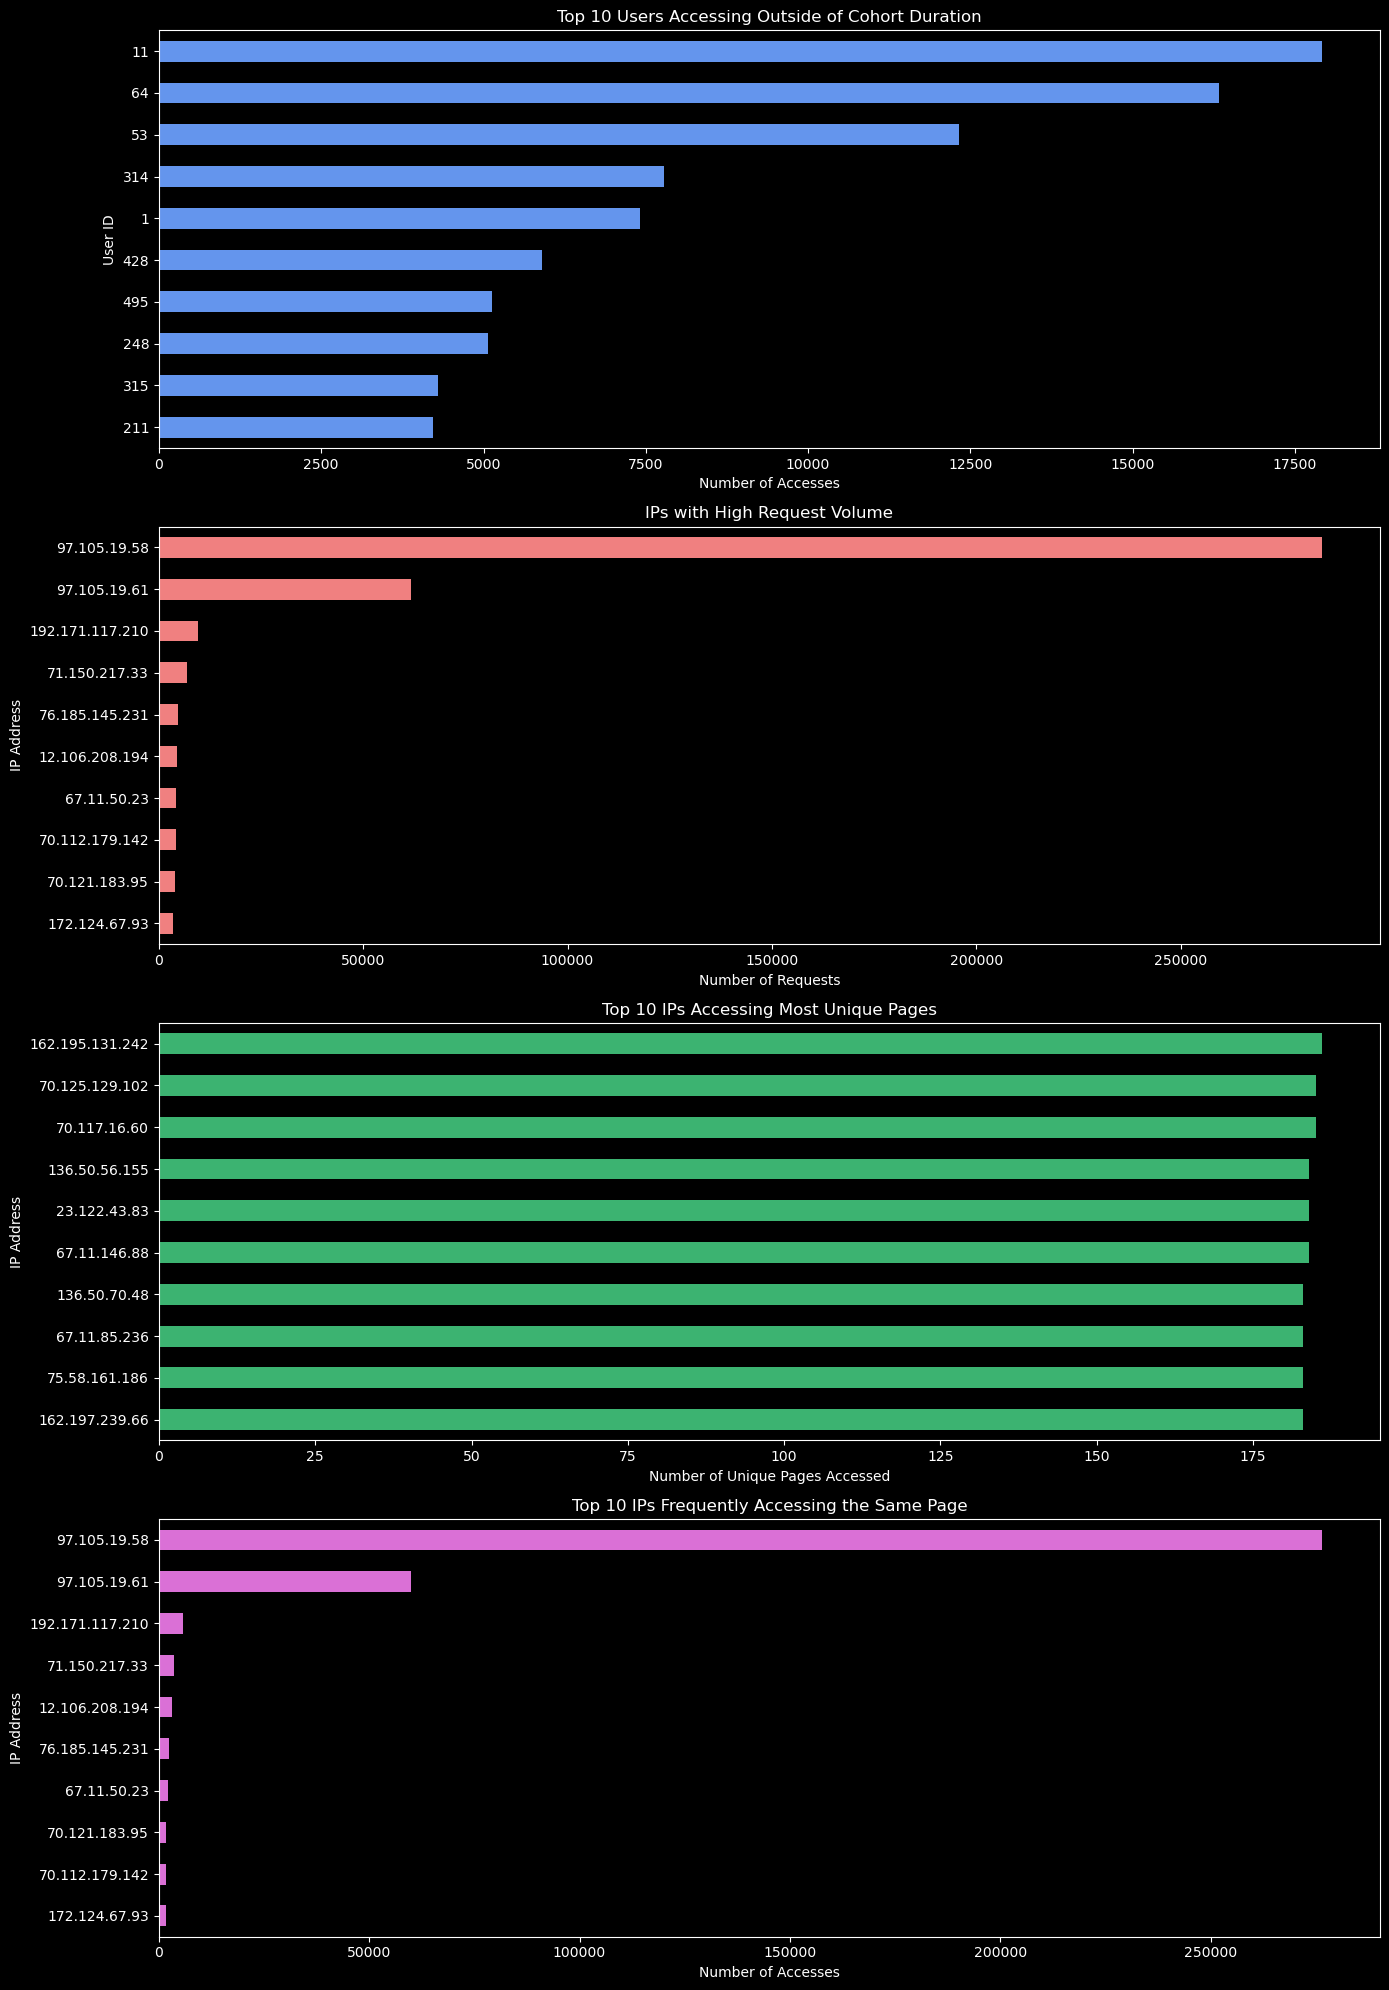

In [40]:
# Set up the figure and axes
fig, axs = plt.subplots(4, 1, figsize=(14, 20))

# 1. Users Accessing Outside of Cohort Duration
outside_users.head(10).sort_values().plot(kind='barh', ax=axs[0], color='cornflowerblue')
axs[0].set_title("Top 10 Users Accessing Outside of Cohort Duration")
axs[0].set_xlabel("Number of Accesses")
axs[0].set_ylabel("User ID")

# 2. High Request Volume
high_request_ips.head(10).sort_values().plot(kind='barh', ax=axs[1], color='lightcoral')
axs[1].set_title("IPs with High Request Volume")
axs[1].set_xlabel("Number of Requests")
axs[1].set_ylabel("IP Address")

# 3. Unique Page Access
high_unique_page_ips.sort_values().head(10).plot(kind='barh', ax=axs[2], color='mediumseagreen')
axs[2].set_title("Top 10 IPs Accessing Most Unique Pages")
axs[2].set_xlabel("Number of Unique Pages Accessed")
axs[2].set_ylabel("IP Address")

# 4. Frequent Access to the Same Page
high_same_page_ips.reset_index().groupby('source_ip').sum().sort_values(by=0, ascending=False).head(10)[0].sort_values().plot(kind='barh', ax=axs[3], color='orchid')
axs[3].set_title("Top 10 IPs Frequently Accessing the Same Page")
axs[3].set_xlabel("Number of Accesses")
axs[3].set_ylabel("IP Address")

plt.tight_layout()
plt.show()


In [43]:
# Show IP 97.105.19.58

df[df.source_ip == '97.105.19.58']

,path,user_id,cohort_id,source_ip,datetime,endpoint,startpoint,name,class_start,class_end,program
86014,javascript-ii/promises,211,1.0,97.105.19.58,2018-07-16 07:51:57,promises,javascript-ii,Arches,2014-02-04,2014-04-22,web
86015,javascript-ii/map-filter-reduce,211,1.0,97.105.19.58,2018-07-16 07:58:03,map-filter-reduce,javascript-ii,Arches,2014-02-04,2014-04-22,web
86016,javascript-ii/promises,211,1.0,97.105.19.58,2018-07-16 07:59:50,promises,javascript-ii,Arches,2014-02-04,2014-04-22,web
86017,index.html,53,14.0,97.105.19.58,2018-07-16 08:07:37,index.html,index.html,Lassen,2016-07-18,2016-11-10,web
86018,javascript-ii,53,14.0,97.105.19.58,2018-07-16 08:07:41,javascript-ii,javascript-ii,Lassen,2016-07-18,2016-11-10,web
...,...,...,...,...,...,...,...,...,...,...,...
491216,toc,625,57.0,97.105.19.58,2020-03-23 15:10:09,toc,toc,Ganymede,2020-03-23,2020-08-20,web
491218,toc,623,57.0,97.105.19.58,2020-03-23 15:10:18,toc,toc,Ganymede,2020-03-23,2020-08-20,web
491221,homepage,627,57.0,97.105.19.58,2020-03-23 15:20:39,,homepage,Ganymede,2020-03-23,2020-08-20,web
491226,homepage,628,57.0,97.105.19.58,2020-03-23 15:24:54,,homepage,Ganymede,2020-03-23,2020-08-20,web


In [42]:
# Show user 11

df[df.user_id == 11]

# Looks like it is a student that started working here?

,path,user_id,cohort_id,source_ip,datetime,endpoint,startpoint,name,class_start,class_end,program
30,homepage,11,1.0,97.105.19.61,2018-01-26 10:14:47,,homepage,Arches,2014-02-04,2014-04-22,web
31,javascript-i,11,1.0,97.105.19.61,2018-01-26 10:14:51,javascript-i,javascript-i,Arches,2014-02-04,2014-04-22,web
33,javascript-i/functions,11,1.0,97.105.19.61,2018-01-26 10:15:02,functions,javascript-i,Arches,2014-02-04,2014-04-22,web
134,appendix/further-reading/javascript/hoisting.html,11,1.0,97.105.19.61,2018-01-26 11:46:29,hoisting.html,appendix,Arches,2014-02-04,2014-04-22,web
136,appendix,11,1.0,97.105.19.61,2018-01-26 11:46:39,appendix,appendix,Arches,2014-02-04,2014-04-22,web
...,...,...,...,...,...,...,...,...,...,...,...
900020,fundamentals/diagram-of-ds-pipeline-fraud-exam...,11,28.0,76.185.131.226,2021-04-21 14:21:05,diagram-of-ds-pipeline-fraud-example.jpeg,fundamentals,Staff,2014-02-04,2014-02-04,staff
900021,fundamentals/ml-methodologies-drawing.jpg,11,28.0,76.185.131.226,2021-04-21 14:21:05,ml-methodologies-drawing.jpg,fundamentals,Staff,2014-02-04,2014-02-04,staff
900022,fundamentals/modern-data-scientist.jpg,11,28.0,76.185.131.226,2021-04-21 14:21:05,modern-data-scientist.jpg,fundamentals,Staff,2014-02-04,2014-02-04,staff
900023,fundamentals/AI-ML-DL-timeline.jpg,11,28.0,76.185.131.226,2021-04-21 14:21:05,AI-ML-DL-timeline.jpg,fundamentals,Staff,2014-02-04,2014-02-04,staff


**Users Accessing Outside of Cohort Duration:** 

- There are several users who accessed the curriculum outside of their cohort's start and end dates. The user with ID 11, for example, accessed the curriculum 17,913 times outside their cohort duration. Although, it looks like a student that is now staff.

**High Request Volume:** 

- IPs like 97.105.19.58 made a total of 284,579 requests, which is unusually high and falls in the top 1% of all IP request counts. Looks like it is a reused IP?

**Unique Page Access:** 

- IPs such as 104.10.49.137 accessed 194 unique pages, which is in the top 1% of IPs based on unique page access. Rapidly accessing a wide variety of pages might suggest automated behavior.

**Frequent Access to the Same Page:** 

- There are several IPs that accessed the same page a high number of times in quick succession. This might indicate either a faulty script or a scraping attempt.

**Suspicious IP Addresses:** 

- There are many IP addresses that accessed the curriculum but are not associated with any known cohort. These might be potential unauthorized accesses.

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

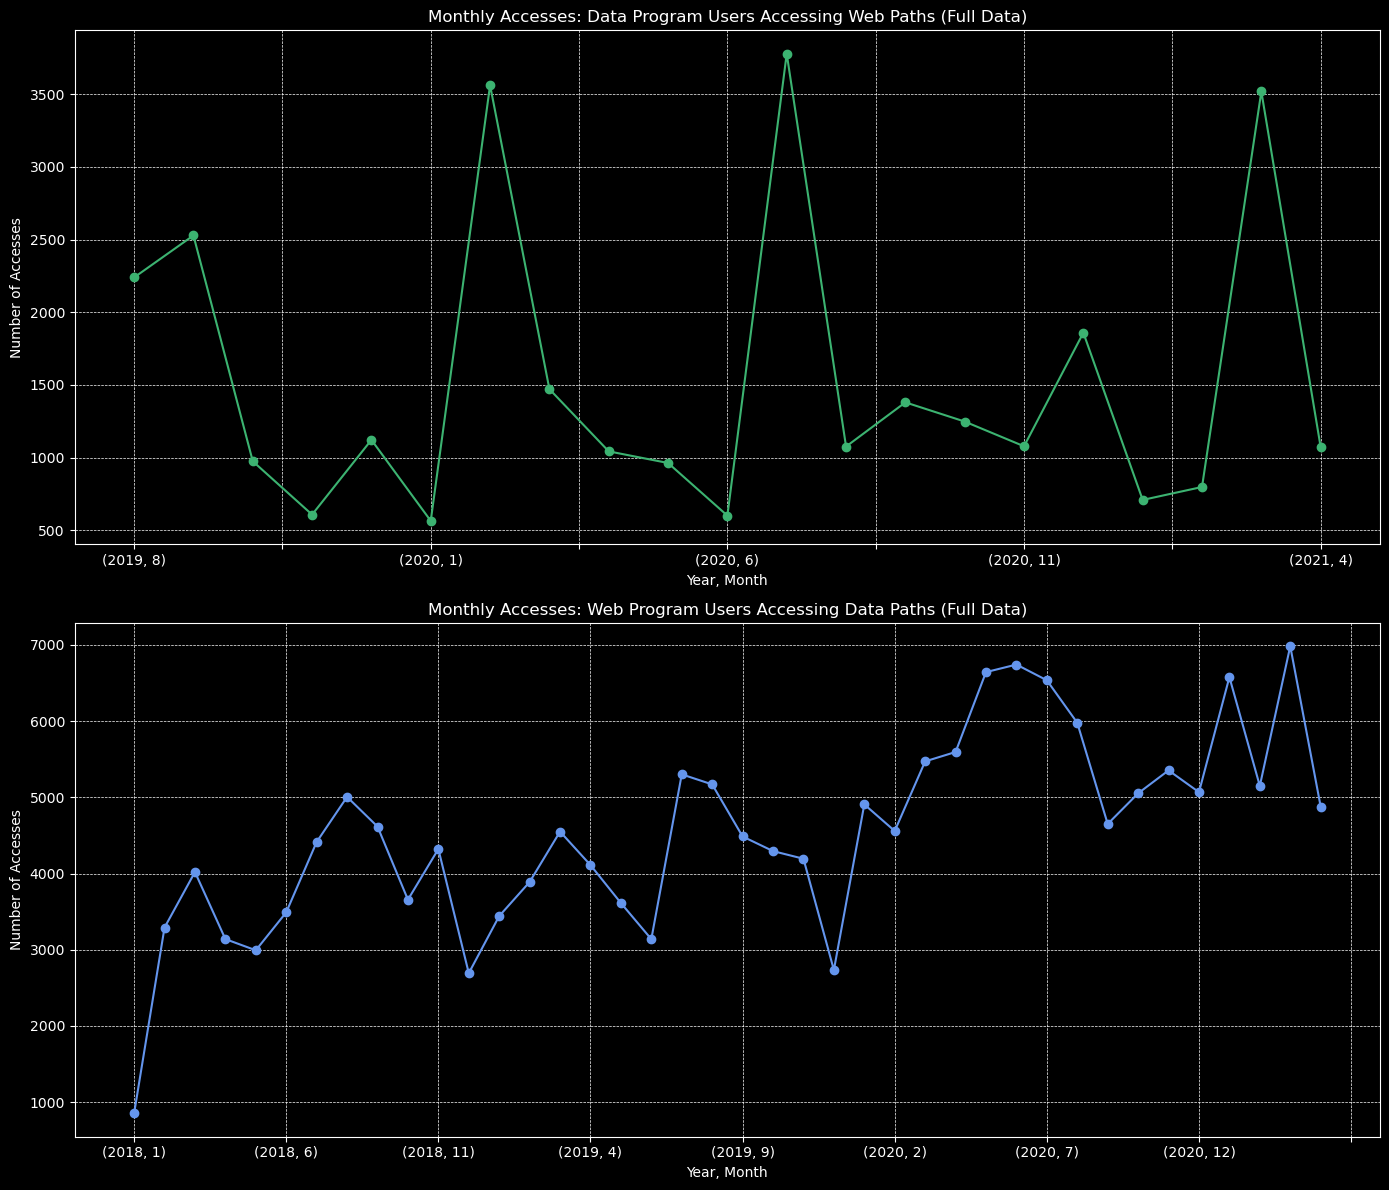

In [52]:
# Identify unique paths for "web" program
web_paths = df[df['program'] == 'web']['path'].unique()

# Drop homepage from web_paths path
web_paths = web_paths[web_paths != 'homepage']

# Identify unique paths for "data" program
data_paths = df[df['program'] == 'data']['path'].unique()

# Drop homepage from data_paths path
data_paths = data_paths[data_paths != 'homepage']

# Check if any users from the "data" program accessed "web" paths in the entire dataframe
all_data_users_accessing_web = df[(df['program'] == 'data') & (df['path'].isin(web_paths))]

# Check if any users from the "web" program accessed "data" paths in the entire dataframe
all_web_users_accessing_data = df[(df['program'] == 'web') & (df['path'].isin(data_paths))]

# Group by month and year and count accesses for data users accessing web paths
all_monthly_data_accessing_web = all_data_users_accessing_web.groupby([all_data_users_accessing_web['datetime'].dt.year, all_data_users_accessing_web['datetime'].dt.month]).size()

# Group by month and year and count accesses for web users accessing data paths
all_monthly_web_accessing_data = all_web_users_accessing_data.groupby([all_web_users_accessing_data['datetime'].dt.year, all_web_users_accessing_data['datetime'].dt.month]).size()

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

all_monthly_data_accessing_web.plot(ax=axs[0], marker='o', color='mediumseagreen', linestyle='-')
axs[0].set_title("Monthly Accesses: Data Program Users Accessing Web Paths (Full Data)")
axs[0].set_xlabel("Year, Month")
axs[0].set_ylabel("Number of Accesses")
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

all_monthly_web_accessing_data.plot(ax=axs[1], marker='o', color='cornflowerblue', linestyle='-')
axs[1].set_title("Monthly Accesses: Web Program Users Accessing Data Paths (Full Data)")
axs[1].set_xlabel("Year, Month")
axs[1].set_ylabel("Number of Accesses")
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

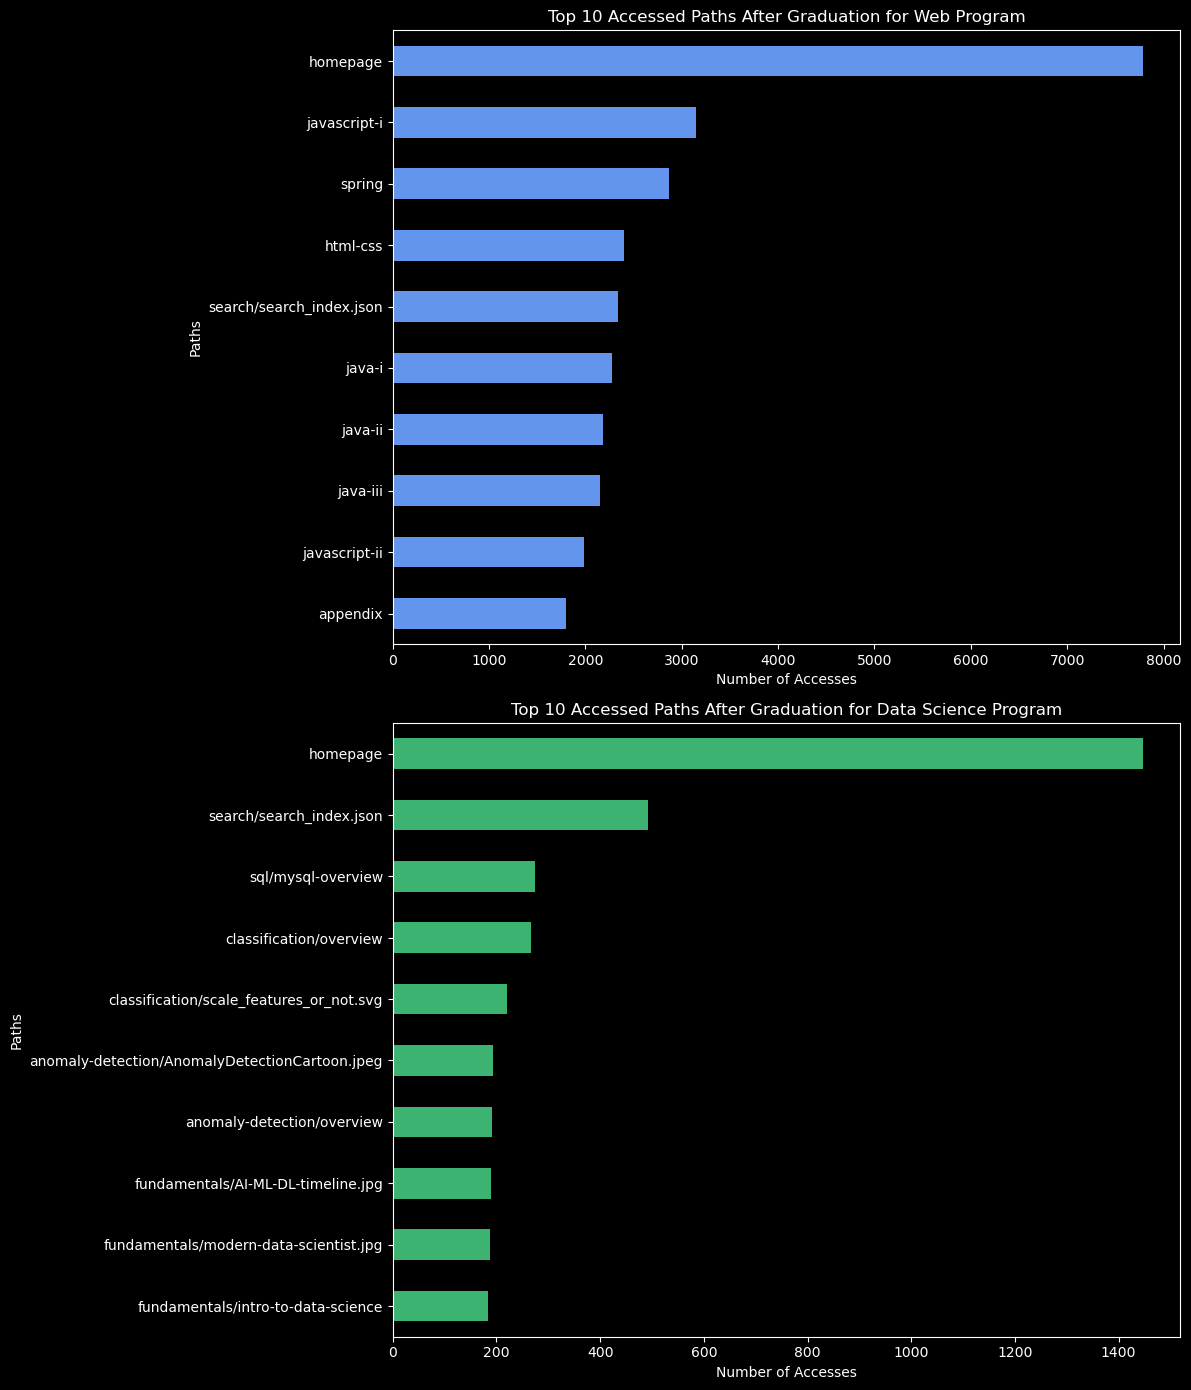

In [47]:
# Filter the dataset to only include records accessed after the class_end date
post_grad_data = df[df['datetime'] > df['class_end']]

# Group by program and path to count accesses
post_grad_access_counts = post_grad_data.groupby('program')['path'].value_counts()

# Identify the top 10 most accessed paths for each program
top_paths_per_program = post_grad_access_counts.groupby('program').head(10)

# Set up the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(12, 14))

# Plotting top 10 post-graduation paths for "web" program
top_paths_per_program['web'].sort_values().plot(kind='barh', ax=axs[0], color='cornflowerblue')
axs[0].set_title("Top 10 Accessed Paths After Graduation for Web Program")
axs[0].set_xlabel("Number of Accesses")
axs[0].set_ylabel("Paths")

# Plotting top 10 post-graduation paths for "data" program
top_paths_per_program['data'].sort_values().plot(kind='barh', ax=axs[1], color='mediumseagreen')
axs[1].set_title("Top 10 Accessed Paths After Graduation for Data Science Program")
axs[1].set_xlabel("Number of Accesses")
axs[1].set_ylabel("Paths")

plt.tight_layout()
plt.show()


### 7. Which lessons are least accessed?

<Axes: ylabel='path'>

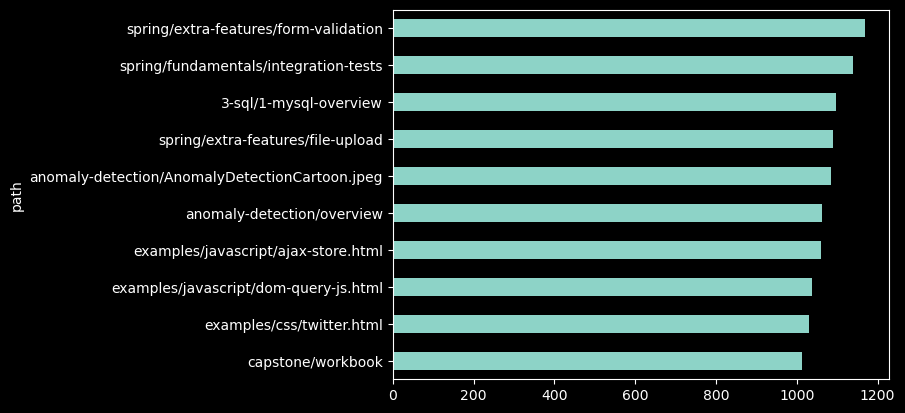

In [57]:
# Count the number of accesses for each path
path_access_counts = df['path'].value_counts()

# Filter out paths with fewer than 1,000 accesses and sort them in ascending order
least_accessed_paths = path_access_counts[path_access_counts >= 1000].sort_values()

least_accessed_paths.head(10).plot.barh()


### 8. Anything else I should be aware of?

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → </i></font> <font size='10'><i>**Model**</i></font> <font size='5'><i>→ Deliver</i></font>
---

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → Model →</i></font> <font size='10'><i>**Deliver**</i></font>
---